### Title: Sprint 5, Integrated Project

Summary: This project is an Exploratory Data Analysis project that uses the games.csv dataframe.  This project consists of: multiple bar charts, boxplots, scatter plots and histograms.  This project also includes standard deviation calculations, correlation calculations and hypothesis testing.

### Step 1: Open the Data File and Study the General Information

In [1]:
#Import the necessary libraries
import pandas as pd

import random

from matplotlib import pyplot as plt

from scipy import stats as st

from scipy.stats import pearsonr

import numpy as np

import seaborn as sns

### Importing the Dataset

In [2]:
#Use pd.read_csv() in order to upload/ read the dataframe.
df = pd.read_csv('games.csv')


#Use the head() method to print the first five rows of the dataframe.
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Code Result:
The games.csv dataframe was imported successfully, but it seems that there are missing values in the dataframe and the column names need to be converted to lowercase. The total_sales column must also be calculated which consists of the total of the NA_sales, EU_sales, JP_sales, and Other_sales column.

### Step 2: Prepare the Data

Renaming the Columns

In [3]:
#Use the .columns method in order to check the column names in the dataframe.
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Code Result:
The column names in the dataframe seem to be listed in uppercase and should be converted to lowercase.  

In [4]:
#Use the str.lower() method in order to convert the column names to lower case.
df.columns = df.columns.str.lower()

#Use the head() method in order to print the first five rows of the dataframe.
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Code Result:
The columns of the df dataframe were converted to lowercase successfully.

In [5]:
#Use the .columns method once again to check the column names in the df dataframe.
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Code Result: The column names in the df dataframe were renamed in lowercase format succesfully.

### Checking the Data Types

In [6]:
#Use the info() method to check the datatypes in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Code Result: The user_score column should be converted from object type to float64 type and the year_of_release column should converted from float64 type to integer type.

In [7]:
#Use the pd.to_numeric() function to convert the user_score column of the df dataframe from object to float64.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [8]:
#Use the pd.to_numeric() function to convert the critic_score column of the df dataframe from object to float64.
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

In [9]:
#Use the info() method once again on the df dataframe in order to check the data types again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Code Result:  
The user_score column was successfull converted from object to float64.  The year_of_release cannot be converted to the proper datatype because there values listed as the string 'tbd' in the column.  The year_of_release column wil be converted to the proper data type further on in the project.

### Creating the total_sales column

In [10]:
#Use the def() function in order to create a function that adds the na_sales, eu_sales, jp_sales, and other_sales in the
#df dataframe in order to create the total_sales column.  Name the function: calc_revenue().
#Use row as an input arguement to calc_revenue().
def calc_revenue(row):
    revenue = 0
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    revenue = na_sales + eu_sales + jp_sales + other_sales
    return revenue

In [11]:
#Use the apply() function in order to apply the previously created calc_revenue() function to the df dataframe and to
#create the total_sales column.
df['total_sales'] = df.apply(calc_revenue, axis=1)

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Code Result:
The total_sales column of the df dataframe was created successfully.

### Checking for Duplicate Values

In [12]:
#Use the duplicated() and sum() methods on the df dataframe in order check for duplicate values.
df.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the dataframe.

### Dealing with Missing Values

In [13]:
#Use the isna() and sum() functions in order to count the number of missing values in the df dataframe.
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

Code Result:
There are missing values noted in the name, year_of_release, critic_score, user_score, and rating columns of the df dataframe.

In [14]:
#Use the dropna() method in order to drop the missing values from the name column of df dataframe by
#adding subset=['name'] as an arguement to df.dropna().
df = df.dropna(subset=['name'])

#Use the isna() and sum() methods on the name column of the df dataframe to check for missing values.
df['name'].isna().sum()

0

Code Result:
There are no more missing values noted in the name column of the df dataframe.

In [15]:
#Use the dropna() method in order to drop the missing values in the year_of_release column
#of the dataframe.  Use the subset parameter to specify the column name.
df = df.dropna(subset=['year_of_release'])

#Use the isna() and sum() methods in order to check for missing values in the year_of_release column of the df dataframe.
df['year_of_release'].isna().sum()

0

Code Result:
There are no more missing values noted in the year_of_release column of the df dataframe.

In [16]:
#Use the astype() method with int as an argument on the year_of_release column of the df dataframe
#in order to convert the column from float64 to int32 data type.
df['year_of_release'] = df['year_of_release'].astype(int)

#Use the info() function on the df dataframe in order to double check the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Code Result:
The year_of_release column of the df dataframe was converted to int32 succesfully.

In [17]:
#Use the dropna() method in order to drop the missing values from the genre column of
#the df dataframe by adding subset=['genre'] as an arguement to df.dropna().
df = df.dropna(subset=['genre'])

#Use the isna() and sum() methods on the genre column of the df dataframe to check for missing values.
df['genre'].isna().sum()

0

Code Result:
There are no more missing values noted in the genre column of the df dataframe.

In [18]:
#Use the fillna() method in order to fill the missing values in the
#rating column of the df dataframe with the string 'undefined'.
df['rating'].fillna('undefined', inplace=True)

#Use the isna() and sum() methods in order to check for missing values in the df dataframe.
df['rating'].isna().sum()

0

Code Result:
There are no more missing values noted in the rating column of the df dataframe.

In [19]:
#Use the dropna() method in order to drop the missing values from the critic_score column of df dataframe by
#adding subset=['critic_score'] as an arguement to df.dropna().
df = df.dropna(subset=['critic_score'])

#Use the isna() and sum() methods on the critic_score column of the df dataframe to check for missing values.
df['critic_score'].isna().sum()

0

Code Result:
There are no more missing values noted in the critic_score column of the df dataframe.

In [20]:
#Use the dropna() method in order to drop the missing values from the user_score column of df
#dataframe by adding subset=['user_score'] as an arguement to df.dropna().
df = df.dropna(subset=['user_score'])

#Use the isna() and sum() methods on the user_score column of the df dataframe to check for missing values.
df['user_score'].isna().sum()

0

Code Result:
There are no more missing values noted in the user_score column of the dataframe.

In [21]:
#Use the isna() and sum() methods in order to double check for missing values in the df dataframe.
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

Code Result:
There are no more missing values noted in the df dataframe. The missing values were filled in or dropped successfully.

### Step 3: Analyze the Data

#### Number of Video Games Released per Year Histogram

Question Being Addressed:
Look at how many games were released in different years. Is the data for every period significant?

Answer: It appears that 2007, 2008, and 2009 had the most amount of games released for those years.  It also appears that 1996, 1997, and 1998 had the least amount of games released for those years.  It also appears that after the spike of games being released in 2007,2008 and 2009, there is a gradual decline in the number of games going towards 2015, but the number of games released slightly increased in 2016.

In [22]:
#Use the groupby() method in order group the df dataframe by the year_of_release column. Use the agg()
#and count() functions in order to count the number of values in the name column of the df dataframe.
sales_games = df.groupby('year_of_release').agg({'name':'count'})

#Use the rename() method on the sales_games dataframe in order to rename the column from 'name' to 'Number of Games Sold'.
#Set the level parameter to 0 in order to indicate columns.
sales_games = sales_games.rename(columns={'name':'Number of Games Sold'}, level=0)

#Use the .index and rename() functions to rename to index to 'year'.
#Assign the code to sales_games.index in order to save the result.
sales_games.index = sales_games.index.rename('year')

# Use the head() method in order to print the first 5 rows of sales_games.
sales_games.head()

,Number of Games Sold
year,
1985,1
1988,1
1992,1
1994,1
1996,8


Code Result:
sales_games was created successfully.

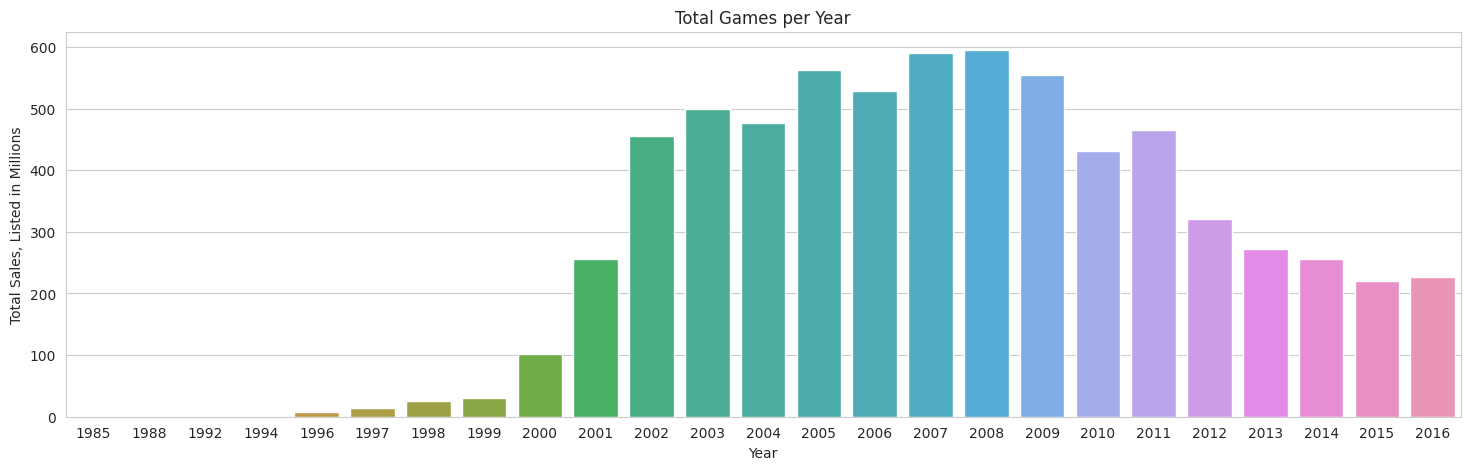

In [23]:
#Use the pivot_table() function in order to create a pivot table with the df dataframe and set the index to the
#'year_of_release' column and the values to the 'name' column. Set the aggfunc parameter to count in order to count
#the values in the 'name' column. Use the reset_index() method in order to reset the index.
sales_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

#Use sns.set_style and pass the arguement 'whitegrid' in order to create a white background for the histogram.
sns.set_style('whitegrid')

#Use plt.figure() and the figsize parameter in order to adjust the figsize to: 18,5.
plt.figure(figsize=(18,5))

#Use sns.countplot in order to create a histogram from the df dataframe with the x axis as the 'year_of_release' column.
sns.countplot(data=df, x='year_of_release');
#Use plt.title to give the histogram the title: 'Total Games per Year'.
plt.title('Total Games per Year')
#Use plt.ylabel in order to name the y axis: 'Total Sales, Listed in Millions'.
plt.ylabel('Total Sales, Listed in Millions');
#Use plt.xlabel in order to name the x axis: 'Year'.
plt.xlabel('Year');

# Total Sales Per Platform Bar Chart

Question being Addressed:
Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.

The platforms with the greatest total sales are:

1) PS2 - $946.01 M per year in total sales.

2) X360 - $853.67 M per year in total sales.

3) PS3 - $785.44 M per year in total sales.

*The distribution for the year for each of these platforms will be displayed in the next task.

In [24]:
#Use the groupby method in order to group the dataframe by platform and use the sum() method in order to
#calculate the sum of the total sales for each platform.
platform_sales = df.groupby('platform')['total_sales'].sum()

#Use the resest_index() method in order to reset the index.  Use the rename() method in order to rename the columns.
platform_sales = platform_sales.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

#Use the head() method to print the first five rows of the platform_sales dataframe.
platform_sales.head()

,platform,total_sales_sum
0,3DS,123.52
1,DC,4.55
2,DS,382.88
3,GBA,131.70
4,GC,159.25


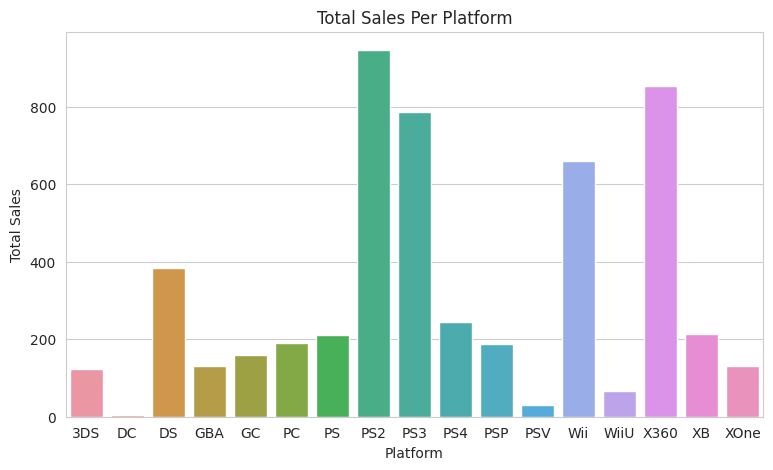

In [25]:
#Use seaborn and matplotlib in order to create a barplot.
plt.figure(figsize=(9,5))
sns.barplot(data=platform_sales, x='platform', y='total_sales_sum')

#Use matplotlib to add labels to the x and y axes and to create a title for
#the bar chart.
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Platform")
plt.show()

Total Sales Per Year of the Top 3 Platforms


Question/Task Answered:
Which platforms are leading in sales?
The platforms which are leading in sales are:
1) PS2
2) X360
3) PS3

In [26]:
#Create a new filtered dataframe called ps_2 that only displays results that have PS2 listed
#as a result for the platform column.
ps_2 = df[df['platform'] == 'PS2']

#Use the head() method to print the first five lines of the ps_2 dataframe.
ps_2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


Code Result:
The entries in the rows of the ps_2 dataframe appear to be listed correctly.  The ps_2 dataframe was created successfully.

In [27]:
#Create a new filtered dataframe called x_360
#that only displays results that have X360 listed as a result for the platform column.
x_360 = df[df['platform'] == 'X360']

#Use the head() method to print the first five lines of the X_360 dataframe.
x_360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


Code Result:
The entries in the rows of the X_360 dataframe appear to be listed correctly.  The X_360 dataframe was created successfully.

In [28]:
#Create a new filtered dataframe called wii that only displays results that have PS3 listed as
#a result for the platform column.
ps_3 = df[df['platform'] == 'PS3']

#Use the head() method to print the first five lines of the PS3 dataframe.
ps_3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


Code Result:
The entries in the rows of the PS3 dataframe appear to be listed correctly.  The wii dataframe was created successfully.

In [29]:
#In order to get rid of stacked values in the data for the bar chart by using the groupby function on the ps_2 dataframe
#and grouping by the dataframe byplatform. Use the sum() method in on the total_sales column of the ps_2 dataframe
#in order to sum up the total values.
ps_2_sum = ps_2.groupby('year_of_release')['total_sales'].sum()

#Use the reset_index() method on the ps_2_sum dataframe. Use the rename() method in order to rename the
#total_sales column to total_sales_sum. Use columns= as the parameter.
ps_2_sum = ps_2_sum.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

# Use the head() function in order to print the first five lines of ps_2_sum.
ps_2_sum.head()

,year_of_release,total_sales_sum
0,2000,29.50
1,2001,145.96
2,2002,169.99
3,2003,144.27
4,2004,188.34


Code Result:
The ps_2_sum dataframe was created successfully.

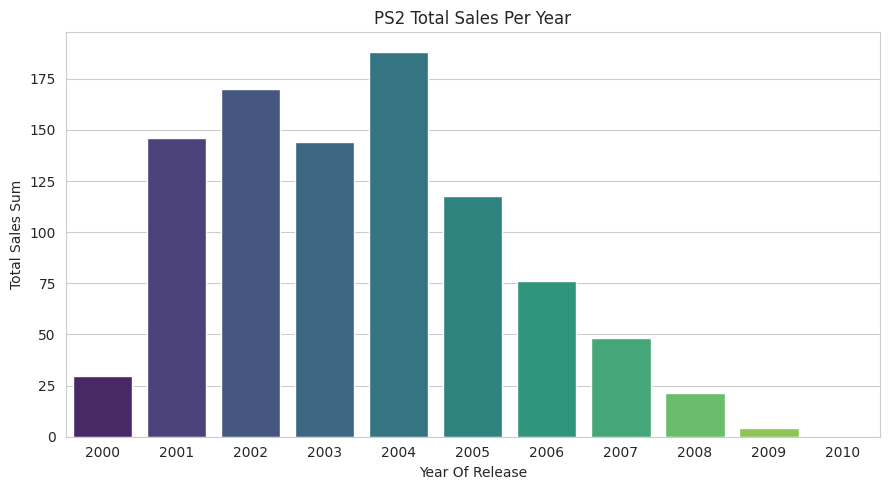

In [30]:
#Use matplotlib and seaborn in order to create a barplot for 'PS2 Total Sales Per Year'.
plt.figure(figsize=(9,5))

sns.barplot(
    data=ps_2_sum,
    x='year_of_release',
    y='total_sales_sum',
    palette='viridis'
)

plt.title('PS2 Total Sales Per Year')
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales Sum')


plt.tight_layout()
plt.show()

Conclusion:  

It appears that PS2 sales were highest in the year 2004 with $211.81 M

total sales noted and PS2 sales were lowest in the year 2011 with $0.45 M

in total sales noted.

In [31]:
#In order to get rid of stacked values in the data for the bar chart by using the groupby function on x_360 dataframe and
#grouping by platform. In the same line of code, use the sum() method in on the total_sales column of the x_360 dataframe in
#order to sum up the total values
x_360_sum = x_360.groupby('year_of_release')['total_sales'].sum()

#Use the reset_index() method on the x_360_sum dataframe. Use the rename() method in order to rename the total_sales column to total_sales_sum.
#Use columns= as the parameter.
x_360_sum = x_360_sum.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

#Use the head() function in order to print the first five lines of x360_sum.
x_360_sum.head()

,year_of_release,total_sales_sum
0,2005,7.64
1,2006,48.92
2,2007,89.39
3,2008,129.16
4,2009,110.67


Code Result:
The x360_sum dataframe was created successfully.

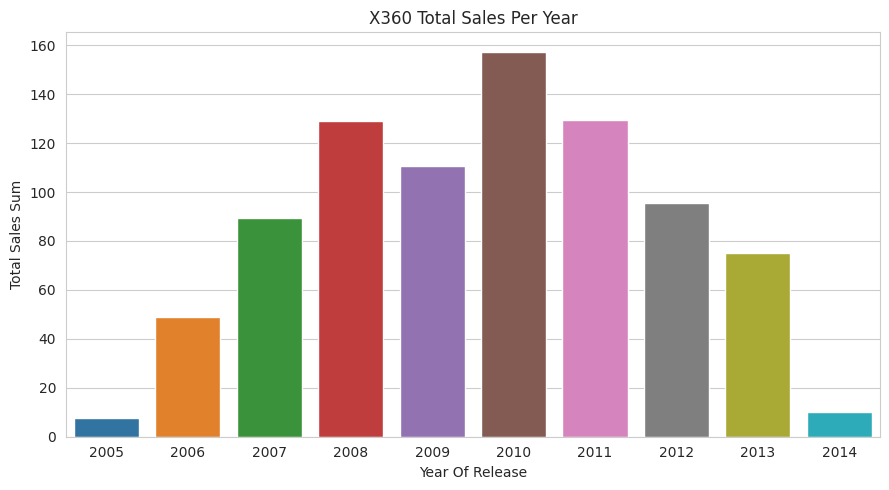

In [32]:
#Use matplotlib and seaborn to create a bar chart for 'X360 Total Sales Per Year'.
plt.figure(figsize=(9,5))

sns.barplot(
    data=x_360_sum,
    x='year_of_release',
    y='total_sales_sum'
)

plt.xlabel('Year Of Release')
plt.ylabel('Total Sales Sum')
plt.title('X360 Total Sales Per Year')
plt.tight_layout()
plt.show()

Conclusion:  

It appears that X360 had the highest total sales in the year 2010 with $180.

21 M in total sales noted and the lowest total sales in the year 2016 with

$1.52 M total sales noted.

In [33]:
#In order to get rid of stacked values in the data for the bar chart use the groupby function on ps_3 dataframe
#and group the datframe by platform. In the same line of code, use the sum() method in on the total_sales column
#of the PS3 dataframe in order to sum up the total values.
ps_3_sum = ps_3.groupby('year_of_release')['total_sales'].sum()

#Use the reset_index() method on the ps_3_sum dataframe.  Use the rename() method in order to rename the total_sales
#column to total_sales_sum. Use columns= as the parameter to specify columns to be renamed.
ps_3_sum = ps_3_sum.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

#Use the head() function in order to print the first five lines of ps_3_sum.
ps_3_sum.head()

,year_of_release,total_sales_sum
0,2006,19.62
1,2007,68.52
2,2008,110.01
3,2009,118.50
4,2010,125.25


Code Result:
The ps_3_sum dataframe was created successfully.

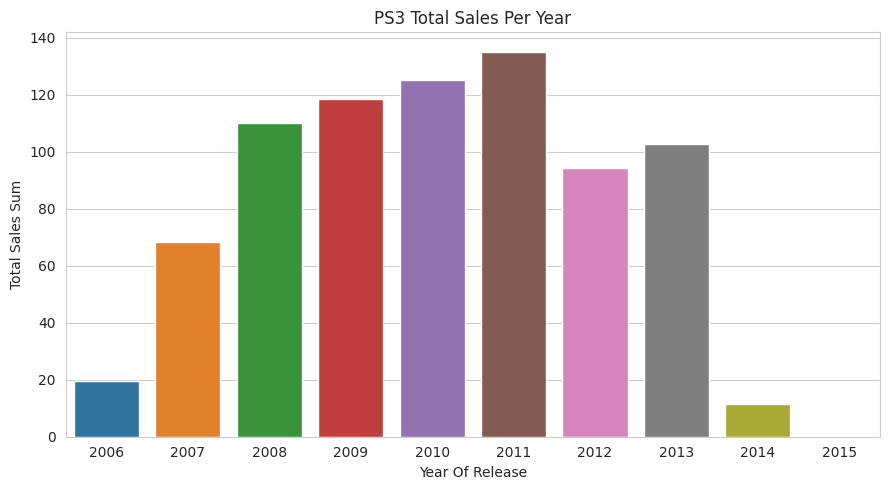

In [34]:
#Use matplotlib and seaborn in order to create a bar chart for 'PS3 Total Sales Per Year'.
plt.figure(figsize=(9,5))

sns.barplot(
    data=ps_3_sum,
    x='year_of_release',
    y='total_sales_sum',
)

plt.title('PS3 Total Sales Per Year')
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales Sum')
plt.tight_layout()

plt.show()

Conclusion:  

It appears that Wii had the highest total sales in the year 2009 with $223.

30 total sales noted and the lowest amount of sales in the year 2016 with

$0.18 in total sales noted.

# Total Sales Per Release Year Line Charts

Question Being Addressed:
 Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

 The platforms that used to be popular, but now have zero sales are as listed: '3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2','PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'  

 The greatest amount of time that it takes for a new platform to appear and fade is approximately 31 years and the shortest amount of time for a new platform to appear and fade is approximately 3 years.

In [35]:
#To make it easier to formulate the latter codes, check the list of unique values in order in the year_of_release columns
#by using the sort_values() and unique() methods in the year_of_release column of the df dataframe.
df['year_of_release'].sort_values().unique()

array([1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

Code Result:
It seems like the most recent year of entries in the year_of_release column of the df dataframe is 2016, which is the year which will be omitted from the new dataframe that will be created in order to form the line charts.

In [36]:
#Create a filtered dataframe from the df dataframe that does not contain any entries for
#'2016' from the year_of_release column of the df dataframe.
no_sales_1 = df[df['year_of_release'] != '2016']

#Use the head() method on the no_sales_1 dataframe in order
#to print the first five rows of the dataframe in order to check for any errors.
no_sales_1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Code Result:
It appears that the entries in the rows of the no_sales_1 dataframe are listed correctly.  The dataframe was created successfully.

In [37]:
#Make a list of the names of the different platforms in the no_sales_1 dataframe by using the unique() method on the dataframe.
no_sales_1['platform'].sort_values().unique()

array(['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4',
       'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'], dtype=object)

Code Result:  There too many different platforms listed in the platform column of the no_sales_1 dataframe.  Four separate line charts must be created so that they information will not be overcrowded by having too many platforms listed in one line chart.

In [38]:
#Create a list that contain the names: '3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2'
#(these are select names of the some of the platforms from the no_sales_1 dataframe) and assign the code to the variable
#no_sales_2_list in order to save the result.
no_sales_2_list = ['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2']

#Use the isin() method in order to create a boolean series that checks if the values in the no_sales_2_list
#are present in the 'platform' column of the no_sales_1 dataframe.
no_sales_2_limited = no_sales_1['platform'].isin(no_sales_2_list)
no_sales_2 = no_sales_1[no_sales_2_limited]

#Create a new dataframe called no_sales_2 by adding the no_sales_2_limited variable as an arguement to a
#closed bracket [] next to the no_sales_2 dataframe.
no_sales_3_list = ['PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

#Follow the same previous steps in order to create the no_sales_3 dataframe.
no_sales_3_limited = no_sales_1['platform'].isin(no_sales_3_list)
no_sales_3 = no_sales_1[no_sales_3_limited]

In [39]:
#In order to make the information cleaner and in order to get rid of stacked values, apply the groupby() method
#to the no_sales_2 dataframe and groupby the platform and year_of_release columns.  Use the agg() and sum() function
#on the total_sales column of the no_sales_2 dataframe. Use the reset_index() method in order to reset the index.
platform_sales_year_1 = no_sales_2.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

#Repeat the same steps for the no_sales_3 dataframe in order to create the platform_sales_year_2 dataframe.
platform_sales_year_2 = no_sales_3.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

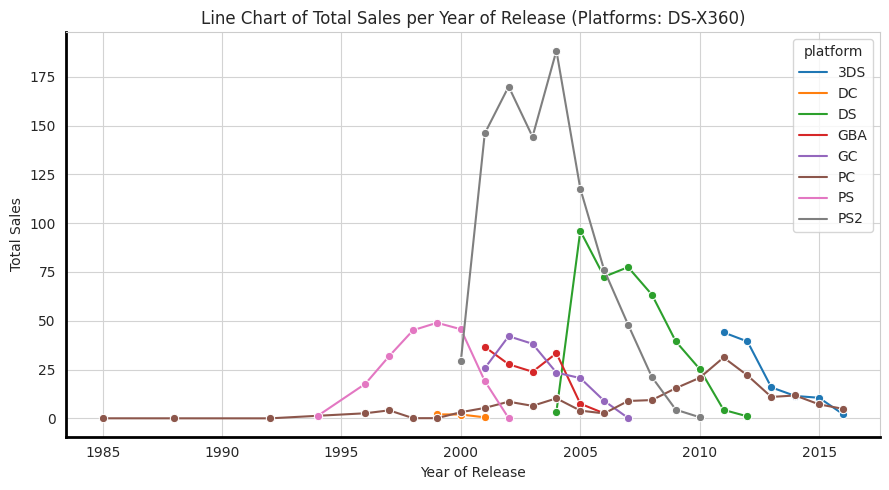

In [40]:
#Use matplotlib and sns.lineplot() in order to create the lineplot.
plt.figure(figsize=(9,5))
sns.lineplot(
    data=platform_sales_year_1,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    marker="o"
)

#Use matplotlib in order to create the title and x and y axes labels.
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title("Line Chart of Total Sales per Year of Release (Platforms: DS-X360)")

# Use plt.gca() in order to create the white plot background.
plt.gca().set_facecolor("white")
#Use plt.grid() in order to create the grey gridline.
plt.grid(True, color='lightgrey')

#Use plt.gca() in order to create and customize the black axes lines.
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)

plt.tight_layout()
plt.show()


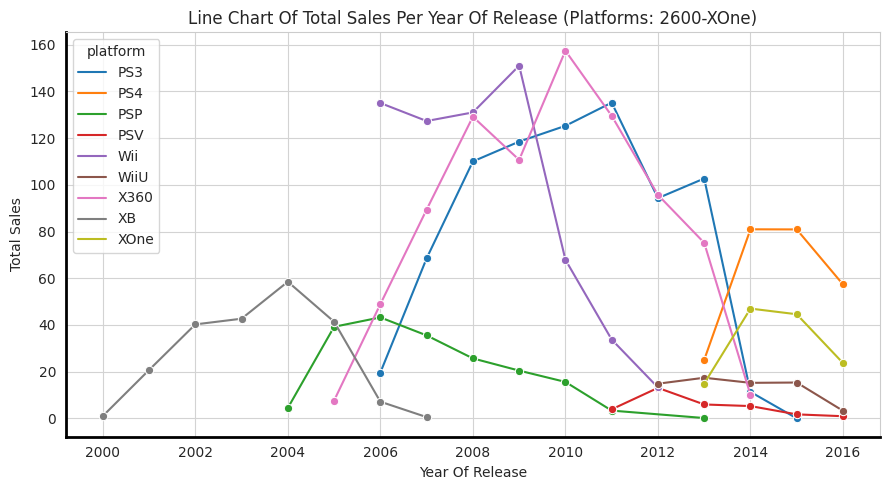

In [41]:
#Use matplotlib and sns.lineplot() in order to create the lineplot.
plt.figure(figsize=(9,5))
sns.lineplot(
    data=platform_sales_year_2,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    marker='o'
)

#Use matplotlib in order to create the title and x and y axes labels.
plt.xlabel("Year Of Release")
plt.ylabel("Total Sales")
plt.title("Line Chart Of Total Sales Per Year Of Release (Platforms: 2600-XOne)")

# Use plt.gca() in order to create the white plot background.
plt.gca().set_facecolor("white")
#Use plt.grid() in order to create the grey gridline.
plt.grid(True, color='lightgrey')

#Use plt.gca() in order to create and customize the black axes lines.
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)

plt.tight_layout()
plt.show()

# 2016 Boxplots

Question/ Task Being Addressed:
Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.

Conclusions For Model for 2017:

1) It appears that the best selling genre for 2016 was 'Shooter' which had
a total of $35.22 M per year total sales, which could possibly be a
profitable genre for 2017.

2) It appears that the best selling platform for 2016 was 'PS4' which had a total sales $57.35 M per year total sales, which could possibly be a profitable platform for 2017.

3) It appears that the best selling rating for games for 2016 is 'M' which had a total sales of $38.17 M per year total sales, which could be a proftiable game rating for 2017.

In [42]:
#Use the sort_values() and unique() methods in order to check the year of release dates in
#ascedning order.
df['year_of_release'].sort_values().unique()

array([1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

Conclusion/Rationale:
I am going to examine the data in the year 2016 because this is the latest release year entry noted in the company
before the year 2017.  Values from the 2016 release year can give insight on future values in the year 2017.

In [43]:
#Create a dataframe that displays only games with 2016 as the release year.
df_2016 = df[df['year_of_release'] == 2016]

#Use the head() method to print the first five rows of the dataframe.
df_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80


In [44]:
#In order to get rid of stacked values in the data for the bar chart,use the groupby()
#function on the df_2016 dataframe and group the dataframe by platform. Use the sum() method in on the
#total_sales column of the df_2016 dataframe in order to sum up the total values.
g_2016 = df_2016.groupby('genre')['total_sales'].sum()

#Use reset_index() method on the g_2016 dataframe to reset the index.  Use the rename()
#method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter
#to specify the columns.
g_2016 = g_2016.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

#Use the head() function in order to print the first five lines of g_2016
g_2016.head()

,genre,total_sales_sum
0,Action,19.37
1,Adventure,1.51
2,Fighting,4.15
3,Misc,0.75
4,Platform,1.20


Code Result:
The g_2016 dataframe was created successfully.

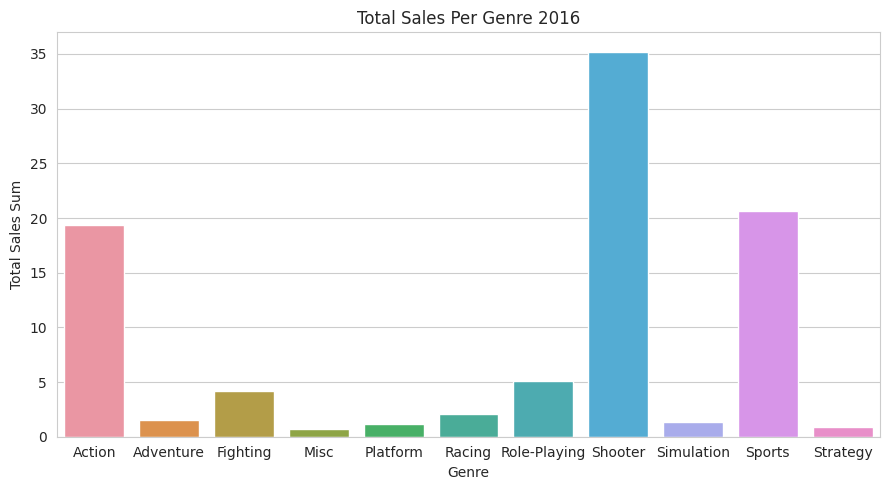

In [45]:
#Use matplotlib and seaborn to create a bar chart for the total sales per game genre
#in games with the release year: 2016.
plt.figure(figsize=(9,5))
sns.barplot(
    data=g_2016,
    x='genre',
    y='total_sales_sum'
)

plt.xlabel('Genre')
plt.ylabel('Total Sales Sum')
plt.title('Total Sales Per Genre 2016')

plt.tight_layout()
plt.show()

In [46]:
#In order to get rid of stacked values in the data for the bar chart by use the
#groupby function on df_2016 dataframe and group the dataframe by platform.
p_2016 = df_2016.groupby('platform')['total_sales'].sum()

#Use the reset_index() method on the p_2016 dataframe to reset the index. Use the rename()
#method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
p_2016 = p_2016.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

#Use the head() function in order to print the first five lines of the p_2016 dataframe.
p_2016.head()

,platform,total_sales_sum
0,3DS,2.17
1,PC,4.89
2,PS4,57.35
3,PSV,0.93
4,WiiU,3.26


Code Result:
The p_2016 dataframe was created successfully.

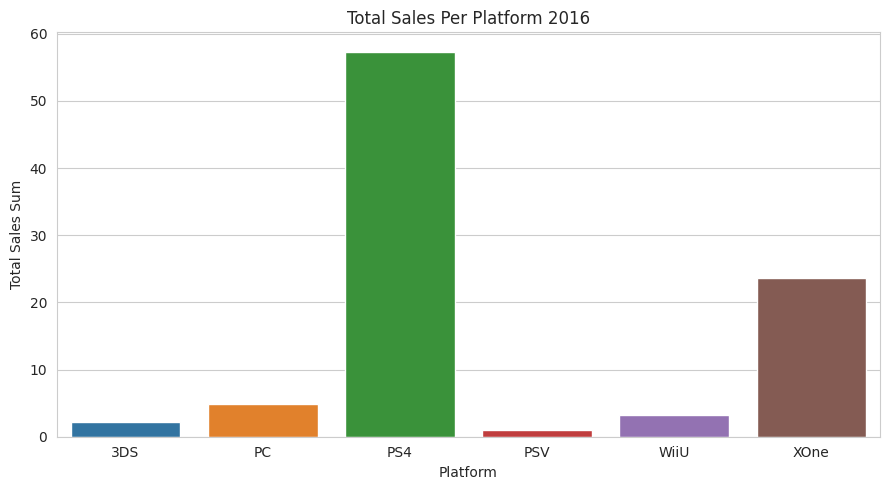

In [47]:
#Use matplotlib and seaborn in order to create a barchart that displays the total
#sales per platform in the year 2016.
plt.figure(figsize=(9,5))

sns.barplot(
    data=p_2016,
    x='platform',
    y='total_sales_sum'
)

plt.xlabel('Platform')
plt.ylabel('Total Sales Sum')
plt.title('Total Sales Per Platform 2016')

plt.tight_layout()
plt.show()

Code Result:
The r_2016 dataframe was created successfully.

In [48]:
#In order to get rid of stacked values in the data for the bar chart, use the groupby()
#function on df_2016 dataframe and grouping by the dataframe platform.  use the sum() method
#on the total_sales column of the df_2016 dataframe in order to sum up the total values.
r_2016 = df_2016.groupby('rating')['total_sales'].sum()

#Use the reset_index() method on the r_2016 dataframe to reset the index. Use the rename() method
#in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter to specify
#the columns.
r_2016 = r_2016.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

#Use the head() method to display the first five rows of the r_2016 dataframe.
r_2016.head()

,rating,total_sales_sum
0,E,23.65
1,E10+,7.06
2,M,38.17
3,T,22.60
4,undefined,0.82


Code Result:
The r_2016 dataframe was created successfully.

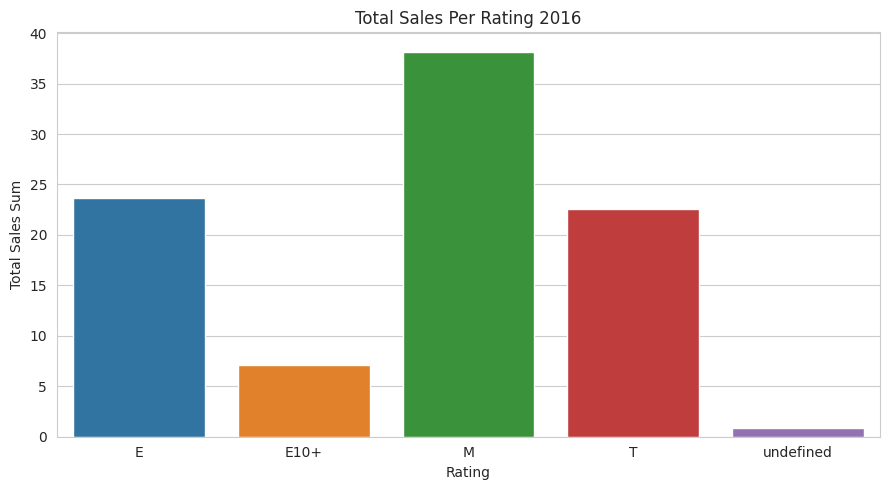

In [49]:
#Use matplotlib and seaborn to create a boxplot that displays total sales
#per rating in the year 2016.
plt.figure(figsize=(9,5))

sns.barplot(
    data=r_2016,
    x='rating',
    y='total_sales_sum'
)

plt.xlabel('Rating')
plt.ylabel('Total Sales Sum')
plt.title('Total Sales Per Rating 2016')

plt.tight_layout()
plt.show()

### Boxplots For Global Sales of All Games

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Conclusions:
Top 3 Platforms with the Highest Average Sales:

1) WiiU is the number 1 platform with the highest average sales with a median sales value of $0.43 M.

2) XOne is the number 2 platform with the highest average sales with a median sales value of  $0.32 M.

3) PS4 is the number 3 platform with the highest average sales with a median sales value of  $0.26 M.

Top 3 Platforms with the Lowest Average Sales:

1) PC is the number 1 platform with the lowest average sales with a median sales value of $0.1 M.

2) PSV is the number 2 platform with the lowest average sales with a median sales value of $0.11 M.

3) X360 is the number 3 platform with the lowest average sales with a median sales value of $0.135 M.

In [50]:
#Use the unique() method in order to check to unique values for
#the year_of_release column.
df['year_of_release'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2004, 2002, 2001, 2011,
       2012, 2014, 1997, 1999, 2015, 2016, 2003, 1998, 1996, 2000, 1994,
       1985, 1992, 1988])

Code Result:  There are too many platform names in the platform column of the df dataframe. Eight separate boxplots must be created in order to display the data in a cleaner fashion and to avoid overcrowding the plot with too much data.  The eight boxplots consist of: 4 boxplots without a limited y axis in order to display the min and max values and four boxplots with the limited y axes in order to display the quartile, median and 75th percentile values for each platform.

In [51]:
#Create a list in order to index the current years.
current_year = [2014, 2015, 2016]

#Use the isin() function in order to generate a boolean list that checks for values in the
#current_year list that are present in the df dataframe.
current_year_1 = df['year_of_release'].isin(current_year)

#Create a dataframe called current_year_df by inputing the current_year_1
#variable in  open brackets[] next to the df dataframe.
current_year_df = df[current_year_1]

#Use the head() method in order to print the first five rows of current_year_df dataframe
#in order to check for errors.
current_year_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Result:
The current_year_df dataframe was created successfully.

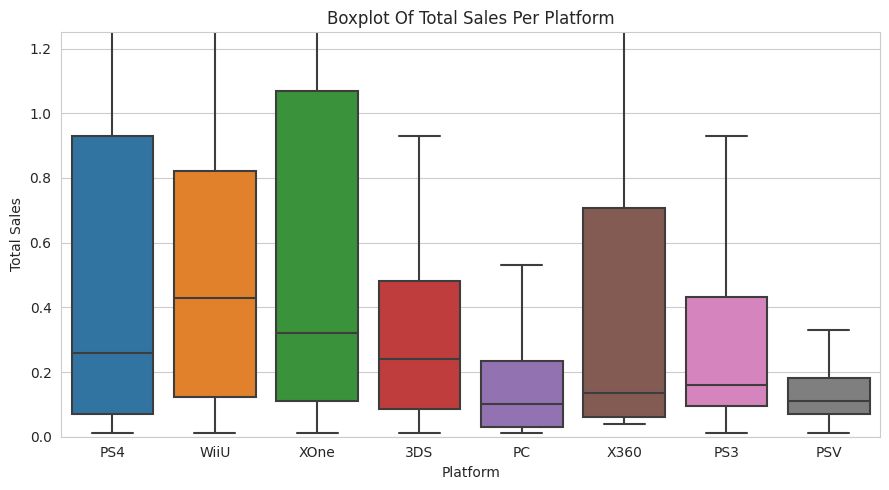

In [52]:
#Use matplotlib and seaborn in order to create a boxplot that displays the percentile
#values of the total sales per platform.
plt.figure(figsize=(9,5))
sns.boxplot(
    data=current_year_df,
    x='platform',
    y='total_sales',
    showfliers=False
)

plt.ylim(0, 1.25)
plt.title('Boxplot Of Total Sales Per Platform')
plt.xlabel("Platform")
plt.ylabel("Total Sales")

plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

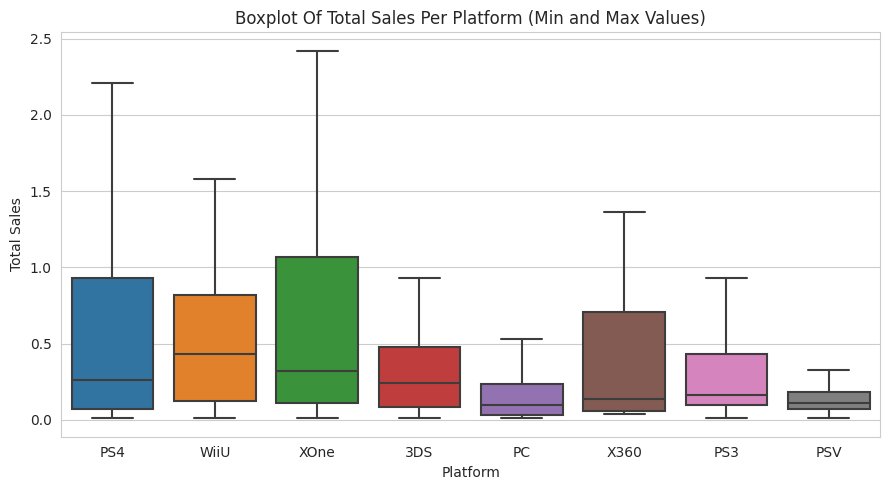

In [53]:
#Use matplotlib and seaborn to create a boxplot that displays the percentile
#values for the total sales per platform that displays the minimum and maximum values.
plt.figure(figsize=(9,5))

sns.boxplot(
    data=current_year_df,
    x='platform',
    y='total_sales',
    showfliers=False
)

plt.title('Boxplot Of Total Sales Per Platform (Min and Max Values)')
plt.xlabel("Platform")
plt.ylabel("Total Sales")

plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

### PS4 Reviews/ Ratings ScatterPlot

Question/Task Being Addressed:
Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Answer:
I chose to use the PS4 platform.  It appears the critic scores between 60-90 have the greatest concentration of total sales and critic scores between 0-40 have the lowest concentration of total sales.  It appears the user scores between 5 and 9 have the greatest concentration of total sales and user scores between 1  and 3 have the lowest concentration of total sales.
The correlation between critic score and total sales is 0.325 which is a positive, moderate correlation. The correlation between user score and total sales is 0.005 which is a fairly weak, but slighty positive correlation. Both critic score and user score columns have a positive slope when compared to the amount of total sales column of the dataframe.

In [54]:
#Use conditional filtering that only displays rows with 'ps_4' entries in the
#platform column of the dataframe.
ps_4 = df[df['platform'] == 'ps_4']

In [55]:
#Create a list of indices of appropriate years.
ps_4_list = [2014, 2015, 2016]

#Use the isin() method in order to create a boolean series that checks if the values in ps_4_list
#are present in the year_of_release column in the dataframe.
ps_4_d = df['year_of_release'].isin(ps_4_list)
#Create the ps_4_df dataframe, which contains values from p2_4_d that
#are present in the dataframe.
ps_4_df = df[ps_4_d]

#Use the head() method in order to print the first 5 lines of ps_4_df.
ps_4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Result:
The ps_4_df dataframe was created successfully.

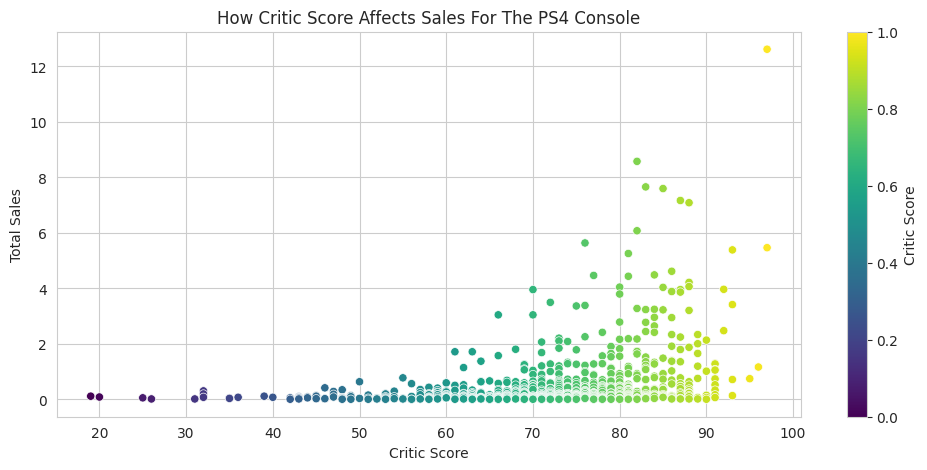

In [56]:
#Use matplotlib and seaborn in order to create a scatterplot that
#shows how critic scores affect sales for the PS4 console.
plt.figure(figsize=(12,5))
sns.scatterplot(
    data=ps_4_df,
    x='critic_score',
    y='total_sales',
    hue='critic_score',
    palette='viridis',
    legend=False
)

plt.title("How Critic Score Affects Sales For The PS4 Console")
plt.xlabel('Critic Score')
plt.ylabel("Total Sales")
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Critic Score')
plt.show()

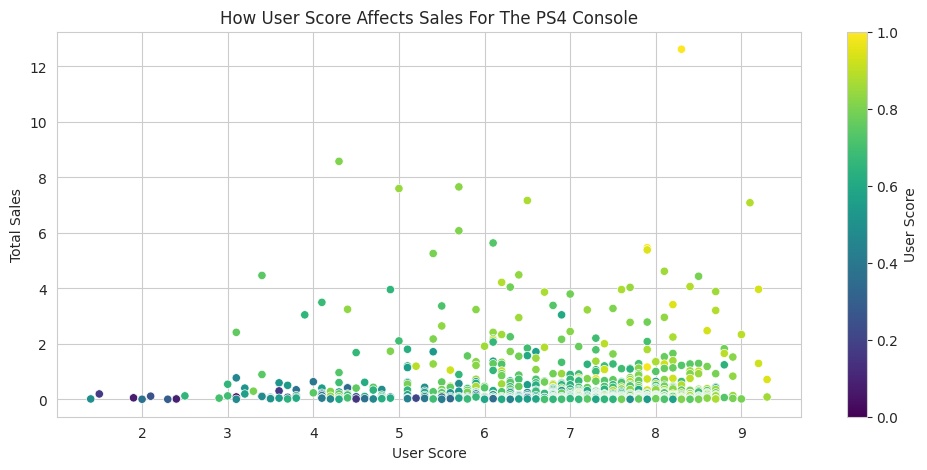

In [57]:
#Use matplotlib and seaborn in order to create a scatterplot that
#shows how user scores affect sales for the PS4 console.
plt.figure(figsize=(12,5))
sns.scatterplot(
    data=ps_4_df,
    x='user_score',
    y='total_sales',
    hue='critic_score',
    palette='viridis',
    legend=False
)

plt.title("How User Score Affects Sales For The PS4 Console")
plt.xlabel('User Score')
plt.ylabel("Total Sales")
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='User Score')
plt.show()

In [58]:
#Create a variable called x_list_1 that consists of the critic_score column of the ps_4_df dataframe.
x_list_1 = ps_4_df['critic_score']
#Create a variable called x_list_2 that consists of the total_sales column of the ps_4_df dataframe.
x_list_2 = ps_4_df['total_sales']

#Use the pearsonr() function to calculate the correlation between x_list_1 and x_list_2.
ps_4_corr = pearsonr(x_list_1, x_list_2)

print(f"Pearson Score Of The Correlation Between 'critic_score' and 'total_sales' Columns Of The ps_4_df Dataframe:\n{ps_4_corr}")

Pearson Score Of The Correlation Between 'critic_score' and 'total_sales' Columns Of The ps_4_df Dataframe:
PearsonRResult(statistic=0.3253626120075883, pvalue=8.023861752089072e-19)


Code Result:
The pearson score shows that there is a weak to moderate postive correlation between the critic_score and
total_sales columns of the ps_4_df dataframe.

In [59]:
#Create a variable called xu_list_1 that consists of the user_score column of the ps_4_df dataframe.
xu_list_1 = ps_4_df['user_score']
#Create a variable called xu_list_2 that consists of the total_sales column of the ps_4_df dataframe.
xu_list_2 = ps_4_df['total_sales']

#Use the pearsonr() function to calculate the correlation between xu_list_1 and xu_list_2.
ps_4_corr_2 = pearsonr(xu_list_1, xu_list_2)

print(f"Pearson Score Of The Correlation Between 'user_score' and 'total_sales' Columns Of The ps_4_df Dataframe:\n{ps_4_corr_2}")

Pearson Score Of The Correlation Between 'user_score' and 'total_sales' Columns Of The ps_4_df Dataframe:
PearsonRResult(statistic=0.005202258360087499, pvalue=0.8904086324923576)


Code Result:
The pearson score shows that there is virtually no linear relationship between the user_score and total_sales columns
of the ps_4_df dataframe.  This finding indicates that there is virtually no correlation between the user_score and
total_sales columns.

### Games on Other Platforms Bar Charts

Question/ Task Being Addressed:
Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Conclusion:
The three games that I chose to display are:

1) LEGO Jurassic World, which had PS4 as its highest selling platform with

$0.9 M in total sales and PC as its lowest selling platform with $0.04 M in

total sales.

2) Watch Dogs, which had PS4 as its highest selling platform with $4.05 M

in total sales and PC as its lowest selling platform with $0.13 M in total

sales.

3) The LEGO Movie Videogame, which had X360 as its highest selling platform

with $1.27 m in total sales and PC as its lowest selling platform with $0.

06 M in total sales.


In [60]:
#Create a list containing the values: 2014, 2015, and 2016, which will serve as an index for the
#timespan for the new dataframe.
games_timeframe_list = 2014, 2015, 2016

#Use the isin() method to return a boolean series that checks if the values in games_timeframe_list
#are present in the year_release column of the dataframe.
games_timeframe = df['year_of_release'].isin(games_timeframe_list)

#Use indexing to create the gt_df dataframe.
gt_df = df[games_timeframe]

#Use the head() method on the gt_df dataframe in order to print the first five rows.
gt_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Result:
The gt_df dataframe was created successfully

In [61]:
#Use the groupby() function on the gt_df dataframe to group the dataframe by name. Use
#the nunique() funcntion on the platform column and the reset_index() function to reset the index.
grouped_platform = gt_df.groupby('name').platform.nunique().reset_index()

#Filter the grouped_platform dataframe with the conditional statement: "grouped_platform.platform > 3"
#in order to only display only unique values that present in more than 3 platforms.
multi_platform_games = grouped_platform[grouped_platform.platform > 3]

#Create a variable called multi_platform_g_name that only consists of the name column from multi_platform_games.
multi_platform_g_name = multi_platform_games['name']

#Apply conditional filtering on the df dataframe using the isin() method that only
#displays entries from the name column of the gt_df dataframe that are present in the multi_platform_g_name variable.
multi_games = gt_df[gt_df['name'].isin(multi_platform_g_name)]

#Use the head() method in order to print the first five rows of multi_games.
multi_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
1180,Watch Dogs,XOne,2014,Action,0.90,0.53,0.00,0.14,78.0,5.8,M,1.57
1548,The LEGO Movie Videogame,X360,2014,Action,0.69,0.47,0.00,0.11,69.0,7.2,E10+,1.27
1559,Metal Gear Solid V: Ground Zeroes,PS4,2014,Action,0.45,0.47,0.17,0.18,75.0,6.2,M,1.27
1775,WWE 2K15,PS4,2014,Sports,0.39,0.57,0.00,0.19,62.0,5.1,T,1.15


Code Result:
The multi_games dataframe was created successfully.

In [62]:
#Use conditional filtering to display only results from the name column of
#the multi_games dataframe that have the name: 'LEGO Jurassic World'.
lj_world = multi_games[multi_games['name'] == 'LEGO Jurassic World']

#Use the head() method on lj_world in order to display the first five rows of the dataframe.
lj_world.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2301,LEGO Jurassic World,PS4,2015,Action,0.32,0.42,0.02,0.14,70.0,7.0,E10+,0.90
3084,LEGO Jurassic World,XOne,2015,Action,0.38,0.22,0.00,0.06,70.0,6.7,E10+,0.66
3840,LEGO Jurassic World,WiiU,2015,Action,0.27,0.19,0.02,0.04,71.0,8.1,E10+,0.52
13941,LEGO Jurassic World,PC,2015,Action,0.00,0.04,0.00,0.00,72.0,7.1,E10+,0.04


Code Result:
lj_world was created successfully

In [63]:
#Use conditional filtering to display only results from
#the name column of the multi_games dataframe that have the name: 'Watch Dogs'.
wd = multi_games[multi_games['name'] == 'Watch Dogs']

#Use the head() method on wd in order to display the first five rows of the dataframe.
wd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
1180,Watch Dogs,XOne,2014,Action,0.90,0.53,0.00,0.14,78.0,5.8,M,1.57
4368,Watch Dogs,PC,2014,Action,0.15,0.26,0.00,0.03,77.0,4.7,M,0.44
9511,Watch Dogs,WiiU,2014,Action,0.07,0.05,0.00,0.01,62.0,6.4,M,0.13


Code Result:
The wd dataframe was created successfully.

In [64]:
#Use conditional filtering to display only results from the name column
#of the multi_games dataframe that have the name: 'The LEGO Movie Videogame'.
lmv = multi_games[multi_games['name'] == 'The LEGO Movie Videogame']

#Use the head() method on lmv in order to display the first five rows of the dataframe.
lmv.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1548,The LEGO Movie Videogame,X360,2014,Action,0.69,0.47,0.00,0.11,69.0,7.2,E10+,1.27
2236,The LEGO Movie Videogame,PS3,2014,Action,0.33,0.43,0.02,0.15,80.0,6.8,E10+,0.93
3011,The LEGO Movie Videogame,PS4,2014,Action,0.24,0.31,0.01,0.11,71.0,7.1,E10+,0.67
3134,The LEGO Movie Videogame,WiiU,2014,Action,0.33,0.23,0.03,0.05,68.0,7.7,E10+,0.64
3769,The LEGO Movie Videogame,XOne,2014,Action,0.35,0.13,0.00,0.05,69.0,6.9,E10+,0.53


Code Result:
The lmv dataframe was created successfully.

In [65]:
#Use the groupby() function on the lj_world dataframe to group the dataframe by platform. Use the sum() method
#to get the sums of the total_sales columns and to get rid of stacked values.
ljw = lj_world.groupby('platform')['total_sales'].sum()

#Use the reset_index() method on ljw in order to reset the index.  Use the
#rename() method along with the columns parameter in order to rename the total_sales column to total_sales_sum.
ljw = ljw.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

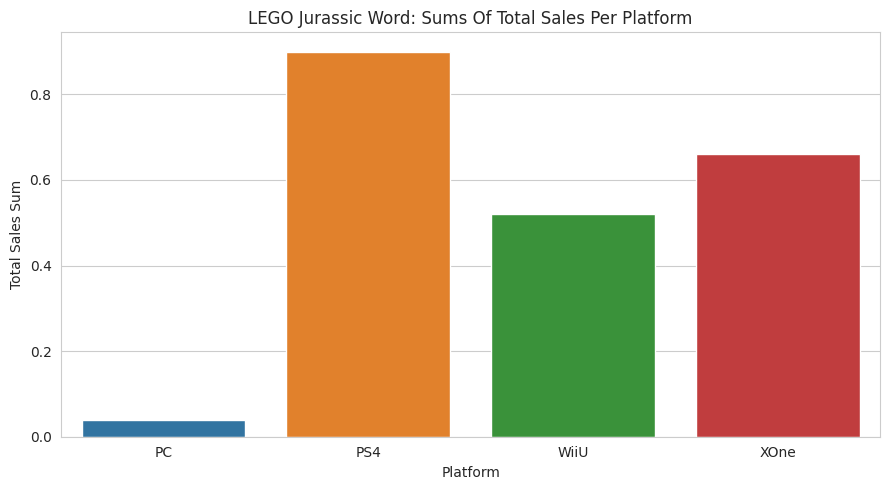

In [66]:
#Use matplotlib and seaborn to create a bar chart that displays the sums of total
#sales per platform for the game: LEGO Jurassic World.
plt.figure(figsize=(9,5))

sns.barplot(
    data=ljw,
    x="platform",
    y="total_sales_sum"
)

plt.xlabel("Platform")
plt.ylabel("Total Sales Sum")
plt.title("LEGO Jurassic Word: Sums Of Total Sales Per Platform")

plt.tight_layout()
plt.show()

In [67]:
#Use the groupby() function on the wd dataframe and group the dataframe by platform.  se the sum() method
#on the total_sales column in order to get the sums of total sales per platforn and to get rid of stacked values.
wd_df = wd.groupby('platform')['total_sales'].sum()

#Use the reset_index() method on wd_df in order to reset the index.  Use the rename()
#method along with the columns parameter in order to rename the total_sales column to total_sales_sum.
wd_df = wd_df.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

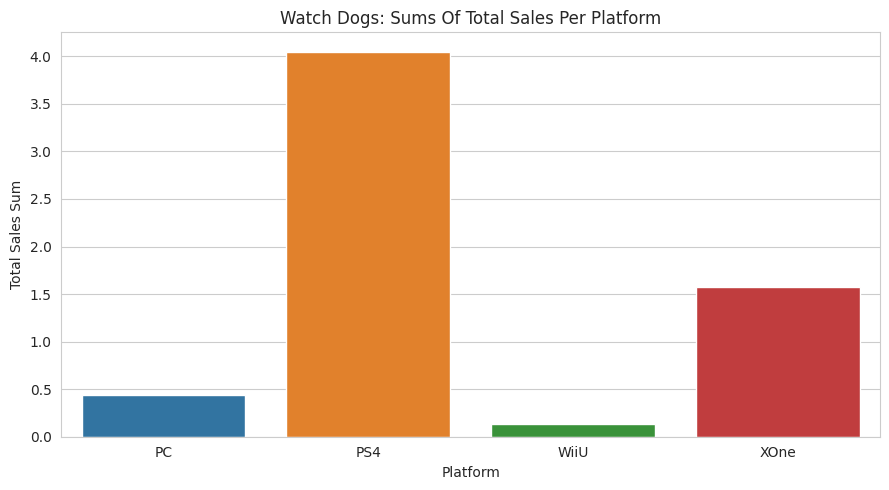

In [68]:
#Use matplotlib and seaborn to create a bar chart that displays the sums of total
#sales per platform for the game: Watch Dogs.
plt.figure(figsize=(9,5))

sns.barplot(
    data=wd_df,
    x="platform",
    y="total_sales_sum"
)

plt.xlabel("Platform")
plt.ylabel("Total Sales Sum")
plt.title("Watch Dogs: Sums Of Total Sales Per Platform")

plt.tight_layout()
plt.show()

In [69]:
#Use the groupby() function on the lmv dataframe and group the dataframe by platform.  Use the sum() method on the
#total_sales column in order to get the sums of total sales per platform and to get rid of stacked values.
lmv_df = lmv.groupby('platform')['total_sales'].sum()

#Use the reset_index() method on lmv_df in order to reset the index.   Use the rename() method
#along with the columns parameter in order to rename the total_sales column to total_sales_sum.
lmv_df = lmv_df.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

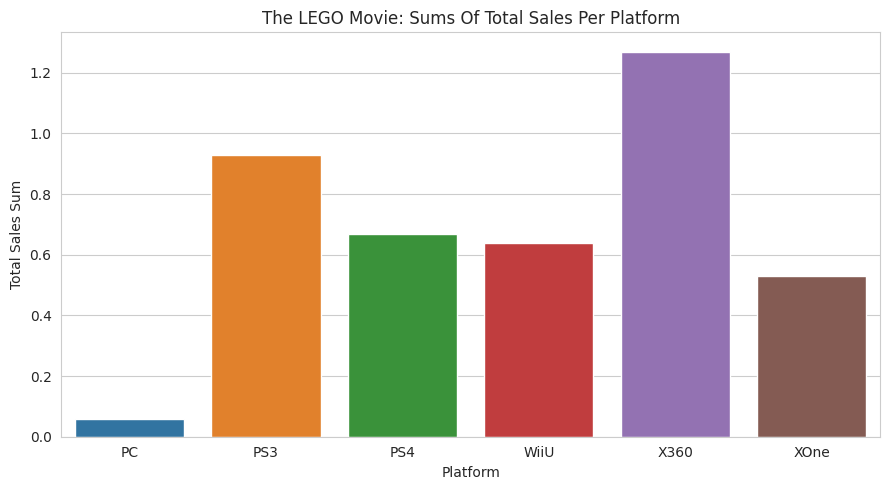

In [70]:
#Use matplotlib and seaborn to create a bar chart that displays the sums of total
#sales per platform for the game: The LEGO Movie.
plt.figure(figsize=(9,5))

sns.barplot(
    data=lmv_df,
    x="platform",
    y="total_sales_sum"
)

plt.xlabel("Platform")
plt.ylabel("Total Sales Sum")
plt.title("The LEGO Movie: Sums Of Total Sales Per Platform")

plt.tight_layout()
plt.show()

In [71]:
#Create a list containing the values: 2014, 2015, 2016 and assign the code to other_list in order to save the result.
other_list = [2014, 2015, 2016]

#Use the isin() method to return a boolean series that checks if the values in other_list are present in
#the dataframe.
other_d = df['year_of_release'].isin(other_list)
#Use indexing to create the other_df dataframe.
other_df = df[other_d]

#Use the head() method on the other_df dataframe in order to print the first five lines of the dataframe.
other_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Result:
The other_df dataframe was created successfully.

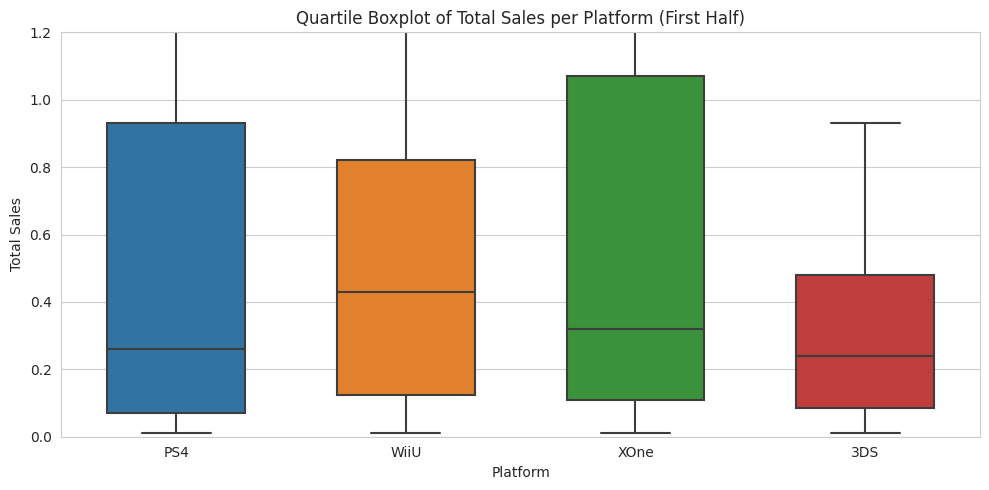

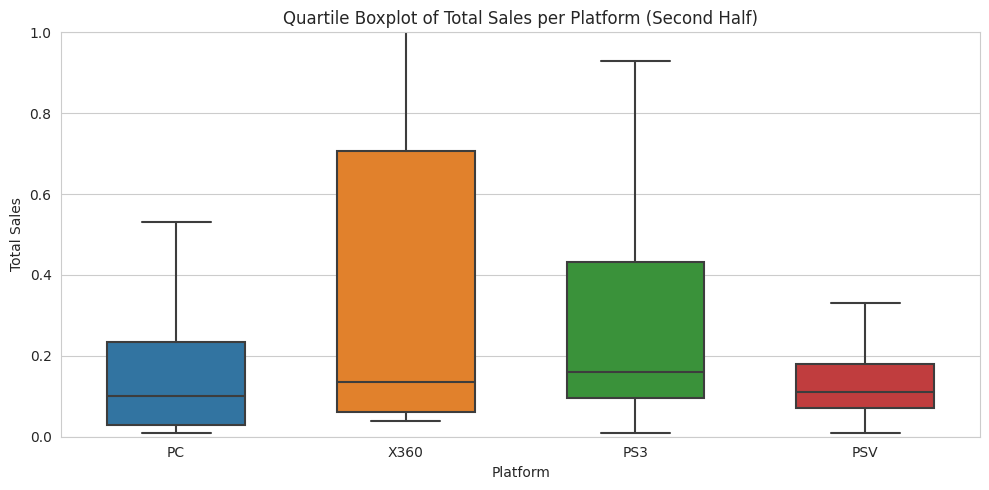

In [72]:
#Rationale: because there are too many genres to fit in one boxplot, the boxplot will
#become crowded if include all the platform in one boxplot.  So, I have decided
#to separate the platforms into two boxplots.

# Use the unique() method to make a list of platforms from the unique values.
platforms = ps_4_df['platform'].unique()

#Use the len() method divide the platforms list in half.
half = len(platforms) // 2
first_half = platforms[:half]
second_half = platforms[half:]

#Use matplotlib and seaborn to create the boxplots.

# First boxplot
plt.figure(figsize=(10,5))
sns.boxplot(
    data=ps_4_df[ps_4_df['platform'].isin(first_half)],
    x='platform',
    y='total_sales',
    showfliers=False,
    width=0.6,
)
plt.ylim(0, 1.2)
plt.title("Quartile Boxplot of Total Sales per Platform (First Half)")
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Second boxplot
plt.figure(figsize=(10,5))
sns.boxplot(
    data=ps_4_df[ps_4_df['platform'].isin(second_half)],
    x='platform',
    y='total_sales',
    showfliers=False,
    width=0.6,
)
plt.ylim(0, 1)
plt.title("Quartile Boxplot of Total Sales per Platform (Second Half)")
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


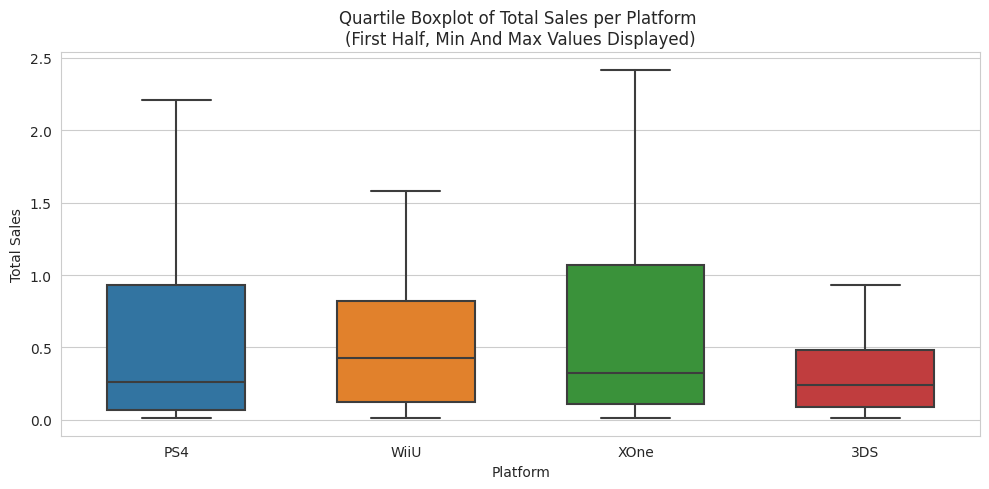

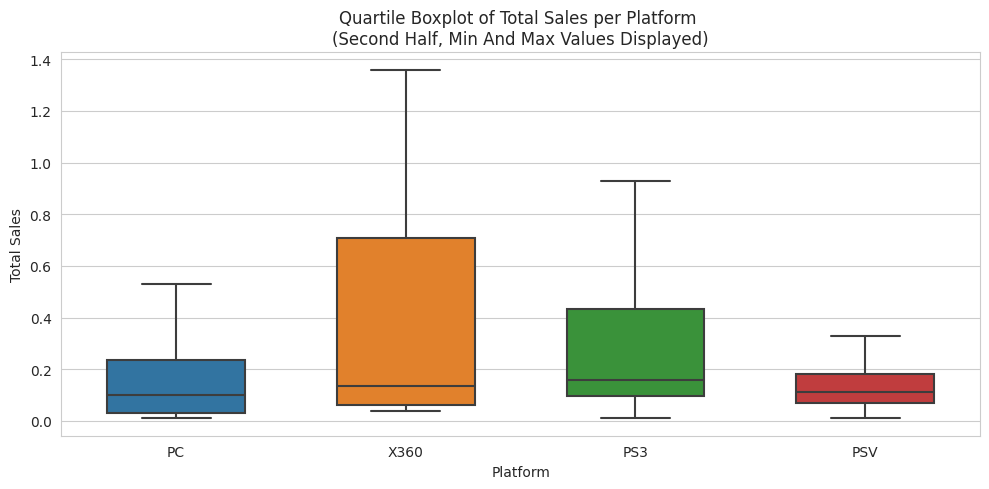

In [73]:
#Use matplotlib and seaborn to create a boxplot that displays the quartile percentile values of the total sales
#per platform that displays the min and max values.

# First boxplot
plt.figure(figsize=(10,5))
sns.boxplot(
    data=ps_4_df[ps_4_df['platform'].isin(first_half)],
    x='platform',
    y='total_sales',
    showfliers=False,
    width=0.6,
)

plt.title("Quartile Boxplot of Total Sales per Platform \n(First Half, Min And Max Values Displayed)")
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Second boxplot
plt.figure(figsize=(10,5))
sns.boxplot(
    data=ps_4_df[ps_4_df['platform'].isin(second_half)],
    x='platform',
    y='total_sales',
    showfliers=False,
    width=0.6,
)

plt.title("Quartile Boxplot of Total Sales per Platform \n(Second Half, Min And Max Values Displayed)")
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

### Total Sales per Genre Boxplots

Task/Question Being Addressed:

Take a look at the general distribution of games by genre. What can we say

about the most profitable genres? Can you generalize about genres with high

and low sales?

The top 3 most profitable genres are:

1) Shooter is the number 1 most profitable genre with: an average total

sales value of $0.62 M, a minimum total sales value of $0.01 M, a 25th

percentile total sales value of $0.162 M, a 75th percentile total sales

value of $1.7 M, and a maximum total sales value of $7.66 M.

2) Sports is the number 2 most profitable genre with: an average total

sales value of $0.43 M, a minimum total sales value of $0.01 M, a 25th

percentile total sales value of $0.1125 M, a 75th percentile total sales

value of $1.005 M, and a maximum total sales value of $8.58 M.

3) Action is number 3 most profitable genre with: an average total sales

value of $0.16 M, a minimum total sales value of $0.01 M, a 25th percentile

total sales value of $0.0625 M, a 75th percentile total sales value of $0.

5375 M, and a maximum total sales value of $12.62 M.

The top 3 least profitable genres are:

1) Adventure is the number 1 least profitable genre with: an average total

sales value of $0.065 M, a minimum total sales value of $0.01 M, a 25th

percentile total sales value of $0.02 M, a 75th percentile total sales

value of $0.12 M, and a maximum total sales value of $1.66 M.

2) Strategy is the number 2 least profitable genre with: an average total

sales value of: $0.105, a minimum total sales value of $0.01 M, a 25th

percentile total sales value of $0.04 M, a 75th percentile total sales

value of $0.24 M, and a maximum total sales value of $0.52 M.

3) Racing is the number 3 least profitable genre with: an average total

sales value of $0.13 M, a minimum total sales value of $0.01 M, a 25th

percentile total sales value of $0.05 M, a 75th percentile total sales

value of $0.3725 M, and a maximum total sales value of $7.09 M.

Conclusion:

According to the boxplots, genres with higher average total sales do not

always have a higher maximum total sales value.  Also, genres with lower

average total sales values do not always have a lower maximum total sales

value as well.

In [74]:
#Create a list containing the values: 2014, 2015, 2016 and assign the code to genre_list in order to save the result.
genre_list = [2014, 2015, 2016]

#Use the isin() method in order to generate a boolean list that checks if the entries in genre list are present in
#the year_of_release column of the dataframe.
genre_d = df['year_of_release'].isin(genre_list)
#Use indexing to create the genre_df dataframe.
genre_df = df[genre_d]

#Use the head() method on the genre_df dataframe in order to print the first five lines of the dataframe.
genre_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Result:  The genre_df dataframe was created successfully.

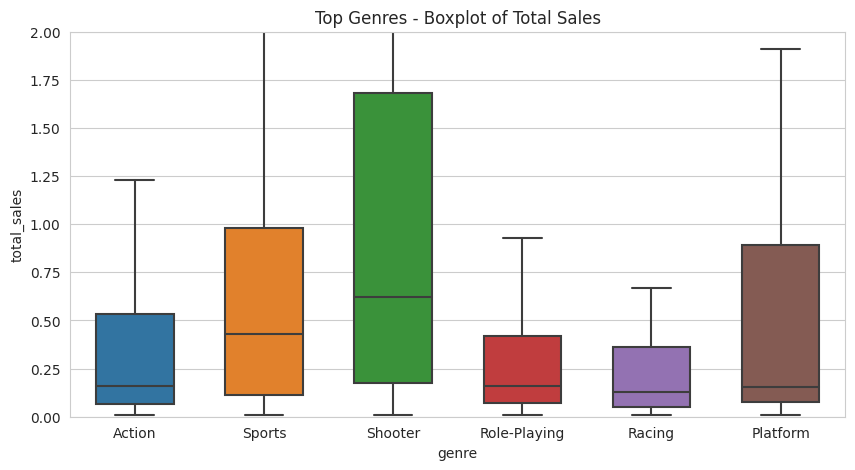

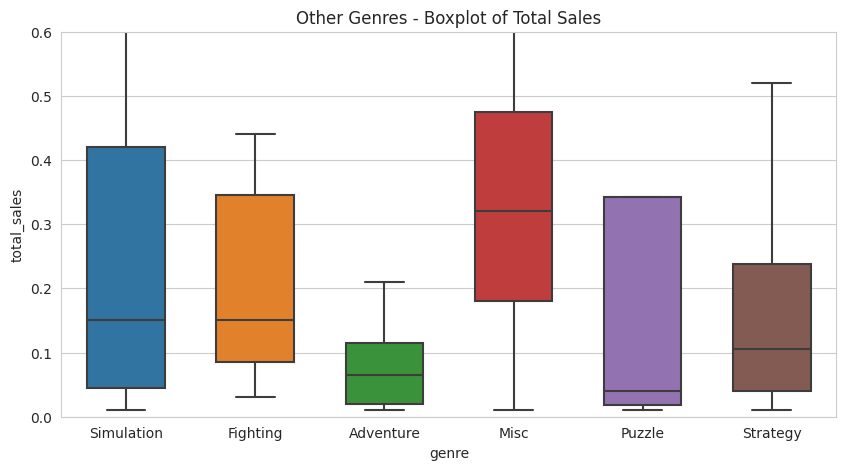

In [75]:
#Rationale: because there are too many genres to fit in one boxplot, the boxplot will
#become crowded if include all the genres in one boxplot.  So, I have decided
#to separate the genres into two boxplots.
top_genres = ["Action","Sports","Shooter","Role-Playing","Racing","Platform"]
other_genres = ["Simulation","Fighting","Adventure","Misc","Puzzle","Strategy"]

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#that displays the values of total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=other_df[other_df["genre"].isin(top_genres)],
            x="genre", y="total_sales", showfliers=False, width=0.6)
plt.title("Top Genres - Boxplot of Total Sales")
plt.ylim(0,2)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=other_df[other_df["genre"].isin(other_genres)],
            x="genre", y="total_sales", showfliers=False, width=0.6)
plt.title("Other Genres - Boxplot of Total Sales")
plt.ylim(0,0.6)
plt.show()

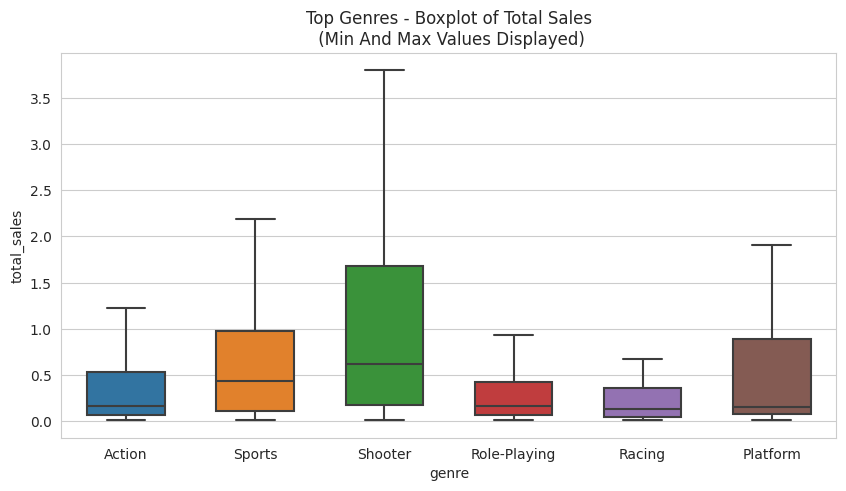

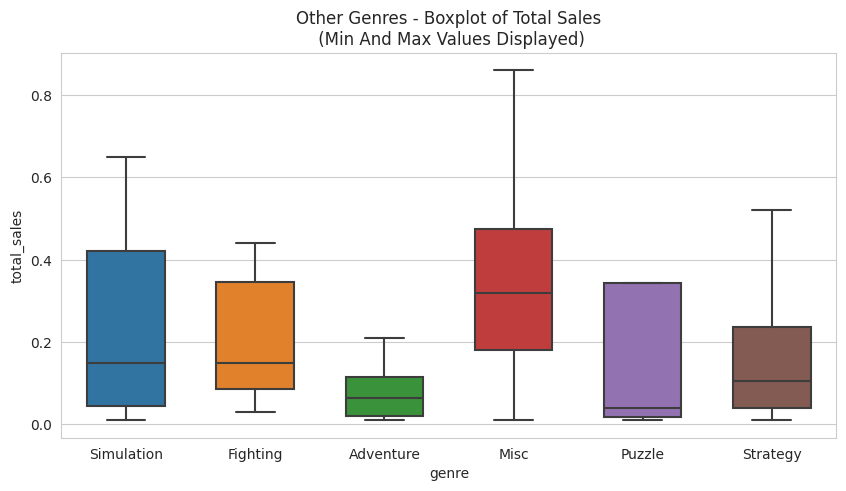

In [76]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#that displays the values of total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=other_df[other_df["genre"].isin(top_genres)],
            x="genre", y="total_sales", showfliers=False, width=0.6)
plt.title("Top Genres - Boxplot of Total Sales\n (Min And Max Values Displayed)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=other_df[other_df["genre"].isin(other_genres)],
            x="genre", y="total_sales", showfliers=False, width=0.6)
plt.title("Other Genres - Boxplot of Total Sales\n (Min And Max Values Displayed)")
plt.show()

### Step 4: Create a User Profile for Each Region

### Boxplots for NA Sales, EU sales and JP sales

Question/ Task Being Addressed:
For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

### NA Profile Conclusions

NA Top 5 Platforms with the Highest Average Sales:

1) WiiU is the number 1 Platform with the highest average sales in NA with a median sales value of $0.195 M.

2) XOne is the number 2 Platform with the highest average sales in NA with a median sales value of $0.19 M.

3) 3DS is the number 3 Platform with the highest average sales in NA with a median sales value of $0.09 M.

4) PS4 is the number 4 Platform with the highest average sales in NA with a median sales value of $0.08 M.

5) X360 is the number 5 Platform with the highest average sales in NA with a median sales value of $0.07 M.

NA Top 5 Genres with the Highest Average Sales:

1) Shooter is the number 1 Genre with the highest average sales in NA with a median sales value of $0.26 M.

2) Sports is the number 2 Genre with the highest average sales in NA with a median sales value of $0.16 M.

3) Platform is the number 3 Genre with the highest average sales in NA with a median sales value of $0.085 M.

4) Action is the number 4 Genre with the highest average sales in NA with a median sales value of $0.06 M.

5) Role Playing is the number 5 Genre with the highest average sales in NA with a median sales value of $0.05 M.

Do Esrb ratings affect sales in NA?

ESRB rating sales in NA have a median sales value of $0.06 M and has a

greater median sales value than  and T rating sales ($0.04 M median sales

value), but not greater than: E10+ ratings median sales ($0.13 M median

sales value) and M rating sales ($0.11 M median sales value).

### EU Profile Conclusions
EU Top 3 Platforms with the Highest Average Sales:

1) WiiU is the number 1 Platform with the highest average sales in EU with a median sales value of $0.14 M.

2) PS4 is the number 2 Platform with the highest average sales in EU with a median sales value of $0.11 M.

3) XOne is the number 3 Platform with the highest average sales in EU with a median sales value of $0.1 M.

4) PC is the number 4 Platform with the highest average sales in EU with a median sales value of $0.07 M.

5) X360 is the number 5 Platform with the highest average sales in EU with a median sales value of $0.055 M.

EU Top 3 Genres with the Highest Average Sales:

1) Mischellaneous is the number 1 Genre with the highest average sales in EU with a median sales value of $0.9 M and a maximum sales value of $9.2 M.

2) Shooter is the number 2 Genre with the highest average sales in EU with
a median sales value of $0.9 M and a maximum sales value of $5.73 M.

3) Racing is the number 3 Genre with the highest average sales in EU with a
median sales value of $0.08 M.

4) Platform is the number 4 Genre with the highest average sales in EU with a median sales values of $0.07 M and a maxmimum sales value of $9.14 M.

5) Fighting is the number 5 Genre with the highest average sales in EU with a median sales value of $0.07 M and a maximum sales value of $2.55 M.

Do Esrb ratings affect sales in EU?

ESRB rating sales in EU have a median sales value of $0.09 M and has a

greater median sales value than  and T rating sales ($0.04 M median sales

value), but not greater than: E10+ ratings median sales ($0.1 M median

sales value) and M rating sales ($0.125 M median sales value).

### JP Profile Conclusions
JP Top 3 Platforms with the Highest Average Sales:

1) 3DS is the number 1 Platform with the highest average sales in JP with a
median sales value of $0.08 M.

2) PSV is the number 2 Platform with the highest average sales in JP with a
median sales value of $0.06 M.

3) WiiU is the number 3 Platform with the highest average sales in JP with a median sales value of $0.025 M.

4) PS3 is the number 4 Platform with the highest average sales in JP with a median sales value of $0.02 M.

5) PS4 is the number 5 Platform with the highest average sales in JP with a median sales value of $0.01 M.

JP Top 3 Genres with the Highest Average Sales:

1) Fighting is the number 1 Genre with the highest average sales in JP with a median sales value of $0.04 M.

2) Puzzle is the number 2 Genre with the highest average sales in JP with a median sales value of $0.035 M.

3) Role Playing is the number 3 Genre with the highest average sales in JP with a median sales value of $0.02 M.

4) Shooter is the number 4 Genre with the highest average sales in JP with a median sales value of $0 and a max sales value of $1.46 M.

5) Stimulation is the number 5 Genre with the highest average sales in JP with a median sales value of $0 and a max sales value of $1.4 M.

Do Esrb ratings affect sales in JP?

ESRB rating sales in JP have a median sales value of $0, which is equal to

the median sales values of M and E10+ rating sales which is also $0, but

not higher than T rating sales which have a median sales value of $0.01 M.

General Conclusions About NA, EU and JP Profiles:

1) WiiU is the number 1 platform with the highest median sales value in NA

and EU, but not in JP. (3DS is the number 1 platform with the highest

median sales value in JP.)

2) Shooter is the number 1 genre with the highest median sales value in NA

and EU, but not in JP. (Fighting is the number 1 genre with the highest

median sales value in JP.)

3) In both NA and EU, ESRB rating sales have a greater median sales values

than T ratings, but not lower median sales values E10+ and M ratings.  

Whereas in JP, ESRB rating sales have a median sales value ($0) that is

equal to both M ratings ($0) and E10+ ratings ($0), but not greater than

the median average sales value of T ratings ($0.01 M).

In [77]:
#Create a dataframe that only displays na_sales by using the drop() method on the df dataframe.
#Add eu_sales, jp_sales, other_sales, and total_sales as an arguement to df.drop() in order to drop those columns.
na_df = df.drop(['eu_sales', 'jp_sales', 'other_sales', 'total_sales'], axis=1)

#Use the head() method in order to print the first five rows of na_df to check for errors.
na_df.head()

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,58.0,6.6,E


Code Result:
The na_df dataframe was created successfully.  The eu_sales, jp_sales, other_sales, total_sales columns were successfully dropped.

In [78]:
#Create a variable called na_yr_list that contains the values: 2014, 2015, and 2016 (not in string form).
na_yr_list = [2014, 2015, 2016]

#Use the isin() method in order to generate a boolean series that checks if the values in na_yr
#list are present in the year_of_release columns of the na_df dataframe.
na_yr = na_df['year_of_release'].isin(na_yr_list)
#Use conditional filtering to create the na_yr_df dataframe.
na_yr_df = na_df[na_yr]

#Use the head() method in order to print the first five rows of na_yr_df.
na_yr_df.head()

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,1.12,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,83.0,5.7,M
94,FIFA 17,PS4,2016,Sports,0.66,85.0,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,2.53,87.0,6.5,M


Code Result:
The na_yr_df was created successfully.

### NA Profile Boxplots


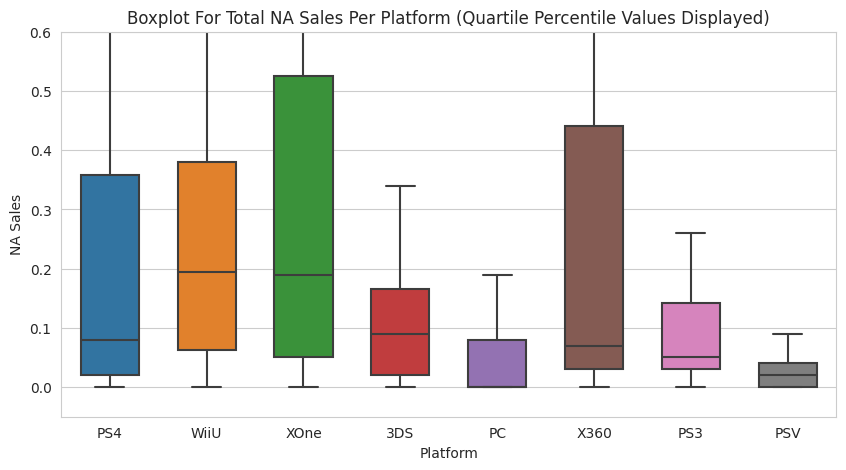

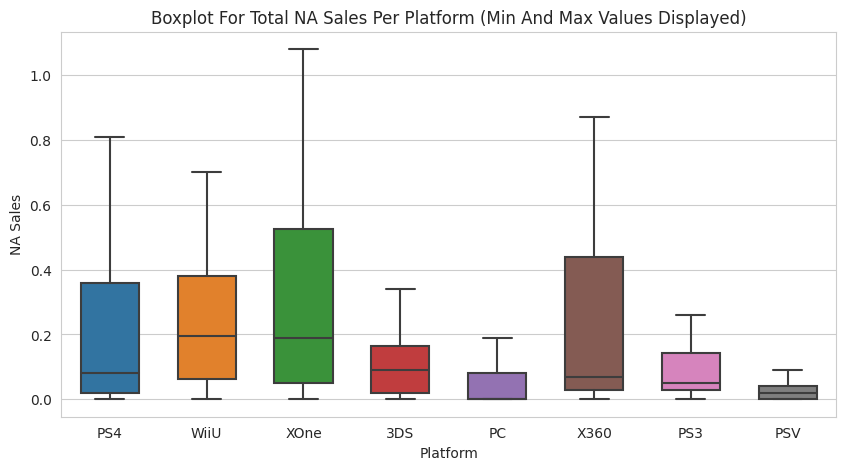

In [79]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of NA total sales per platform.
plt.figure(figsize=(10,5))
sns.boxplot(data=na_yr_df,
            x="platform",
            y="na_sales",
            showfliers=False,
            width=0.6)

plt.ylim(-0.05, 0.6)
plt.xlabel("Platform")
plt.ylabel("NA Sales")
plt.title("Boxplot For Total NA Sales Per Platform (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of NA total sales per platform.
plt.figure(figsize=(10,5))
sns.boxplot(data=na_yr_df,
            x="platform",
            y="na_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Platform")
plt.ylabel("NA Sales")
plt.title("Boxplot For Total NA Sales Per Platform (Min And Max Values Displayed)")
plt.show()

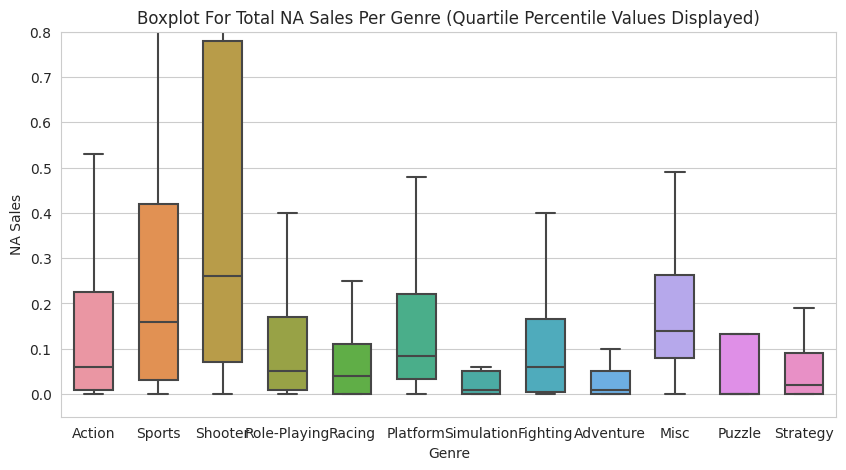

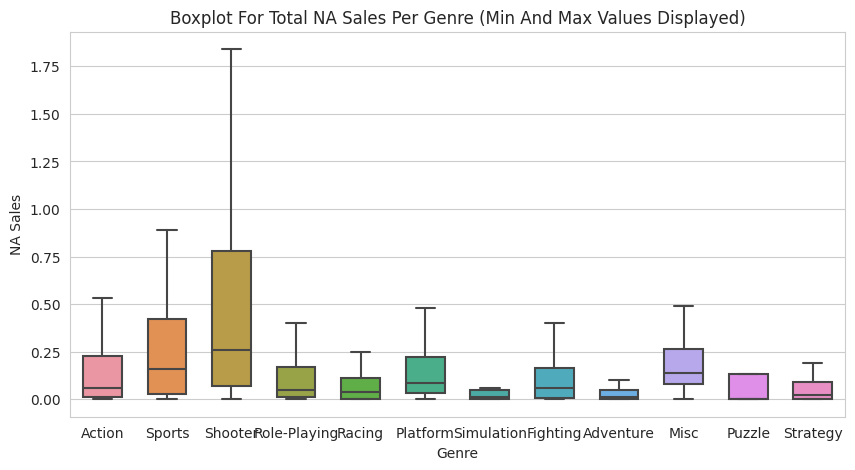

In [80]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of NA total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=na_yr_df,
            x="genre",
            y="na_sales",
            showfliers=False,
            width=0.6)

plt.ylim(-0.05, 0.8)
plt.xlabel("Genre")
plt.ylabel("NA Sales")
plt.title("Boxplot For Total NA Sales Per Genre (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the min and max values
#of NA total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=na_yr_df,
            x="genre",
            y="na_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Genre")
plt.ylabel("NA Sales")
plt.title("Boxplot For Total NA Sales Per Genre (Min And Max Values Displayed)")
plt.show()

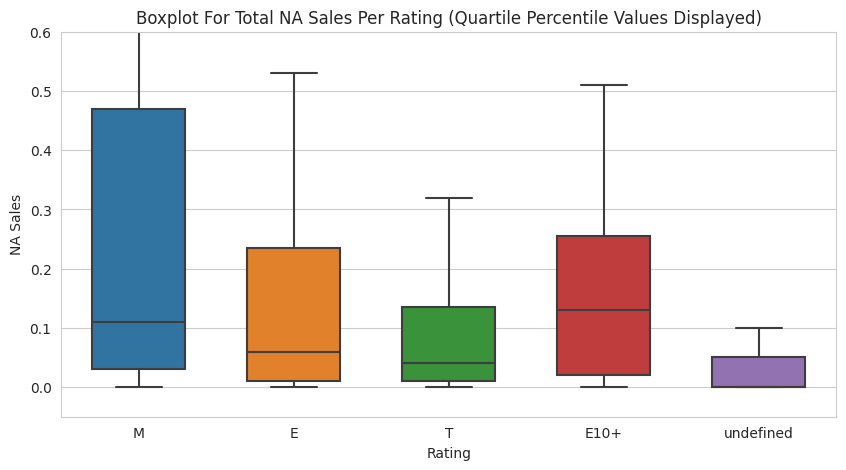

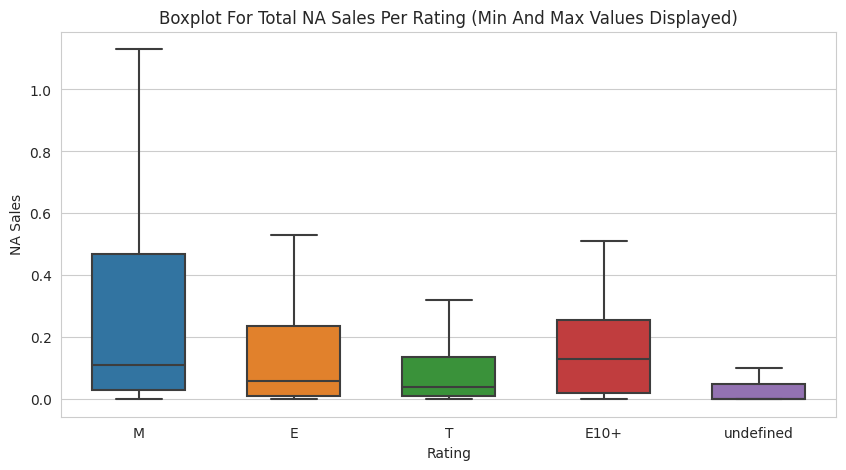

In [81]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of NA total sales per rating.
plt.figure(figsize=(10,5))
sns.boxplot(data=na_yr_df,
            x="rating",
            y="na_sales",
            showfliers=False,
            width=0.6)

plt.ylim(-0.05, 0.6)
plt.xlabel("Rating")
plt.ylabel("NA Sales")
plt.title("Boxplot For Total NA Sales Per Rating (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the min and max values
#of NA total sales per rating.
plt.figure(figsize=(10,5))
sns.boxplot(data=na_yr_df,
            x="rating",
            y="na_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Rating")
plt.ylabel("NA Sales")
plt.title("Boxplot For Total NA Sales Per Rating (Min And Max Values Displayed)")
plt.show()

### EU Profile Boxplots

In [82]:
#Create a dataframe that only displays eu_sales by using the drop() method on the df dataframe.
#Add na_sales, jp_sales, other_sales, and total_sales as an arguement to df.drop() in order to drop those columns.
eu_df = df.drop(['na_sales', 'jp_sales', 'other_sales', 'total_sales'], axis=1)

#Use the head() method in order to print the first five rows of eu_df to check for errors.
eu_df.head()

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,28.96,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,12.76,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,10.93,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,9.14,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,9.18,58.0,6.6,E


Code Result:
The eu_df dataframe was created successfully.  The na_sales, jp_sales, other_sales, total_sales columns were successfully dropped.

In [83]:
#Create a variable called eu_yr_list that contains the values: 2014, 2015, and 2016 (not in string form).
eu_yr_list = [2014, 2015, 2016]
#Use the isin() method on the eu_df dataframe with eu_yr_list as an arguement.
eu_yr = eu_df['year_of_release'].isin(eu_yr_list)
#Use conditional filtering to create the eu_yr_df dataframe.
eu_yr_df = eu_df[eu_yr]

#Use the head() method in order to print the first five rows of eu_yr_df.
eu_yr_df.head()

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,6.31,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,6.12,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,3.48,83.0,5.7,M
94,FIFA 17,PS4,2016,Sports,5.75,85.0,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,3.27,87.0,6.5,M


Code Result:
The eu_yr_df was created successfully.

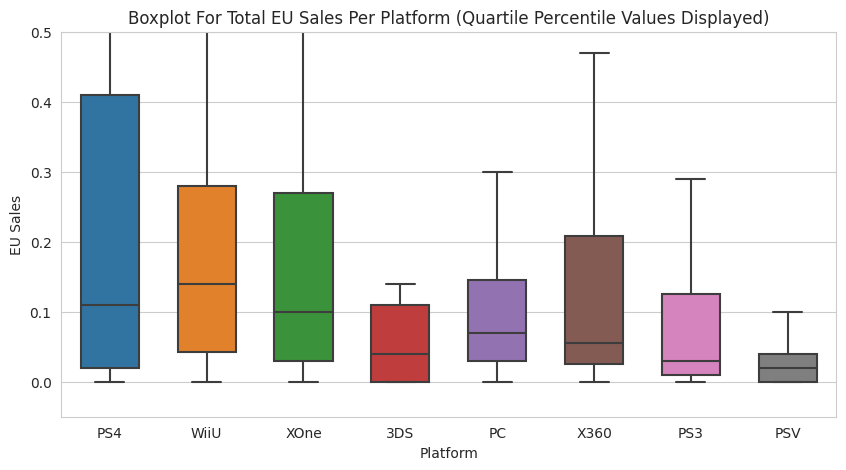

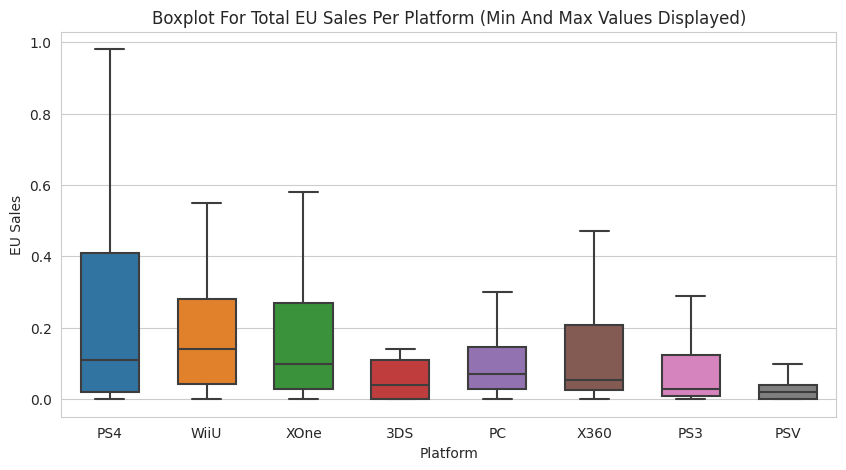

In [84]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per platform.
plt.figure(figsize=(10,5))
sns.boxplot(data=eu_yr_df,
            x="platform",
            y="eu_sales",
            showfliers=False,
            width=0.6)

plt.ylim(-0.05, 0.5)
plt.xlabel("Platform")
plt.ylabel("EU Sales")
plt.title("Boxplot For Total EU Sales Per Platform (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per platform.
plt.figure(figsize=(10,5))
sns.boxplot(data=eu_yr_df,
            x="platform",
            y="eu_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Platform")
plt.ylabel("EU Sales")
plt.title("Boxplot For Total EU Sales Per Platform (Min And Max Values Displayed)")
plt.show()

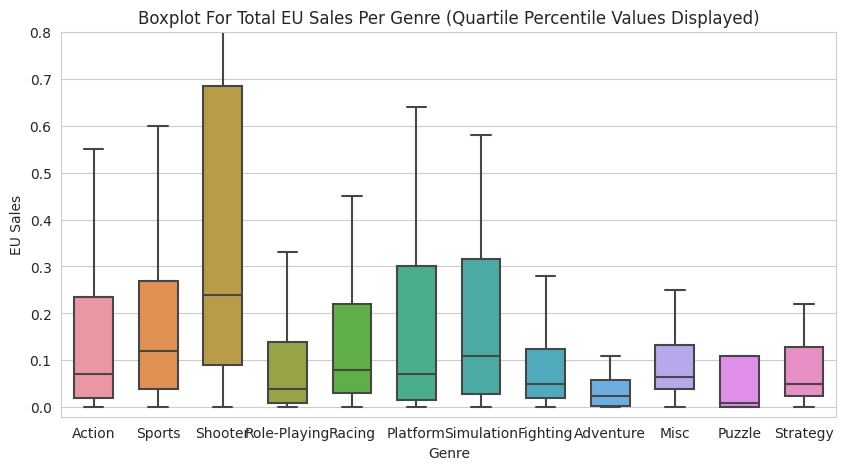

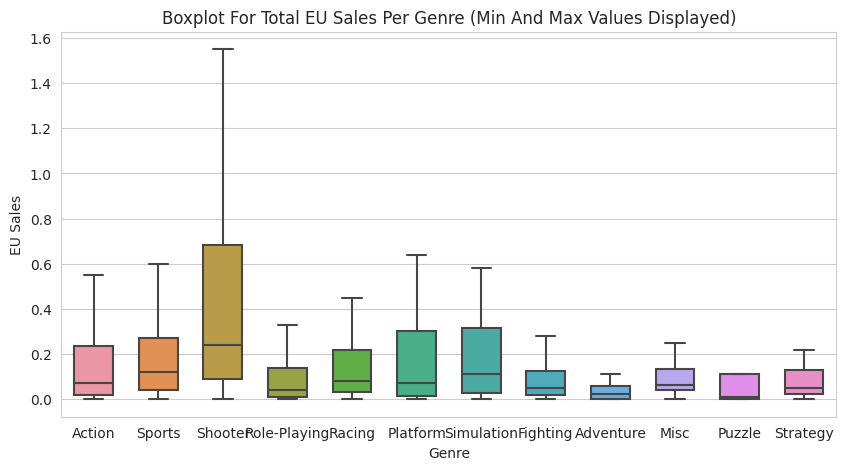

In [85]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=eu_yr_df,
            x="genre",
            y="eu_sales",
            showfliers=False,
            width=0.6)

plt.ylim(-0.02, 0.8)
plt.xlabel("Genre")
plt.ylabel("EU Sales")
plt.title("Boxplot For Total EU Sales Per Genre (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=eu_yr_df,
            x="genre",
            y="eu_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Genre")
plt.ylabel("EU Sales")
plt.title("Boxplot For Total EU Sales Per Genre (Min And Max Values Displayed)")
plt.show()

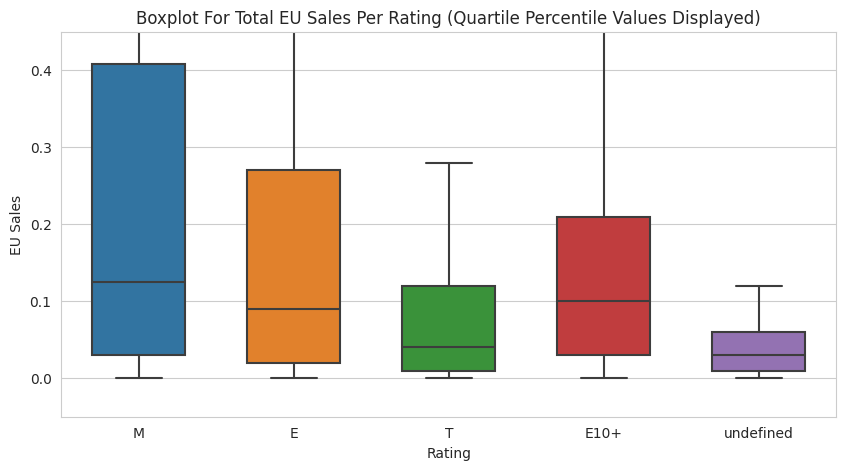

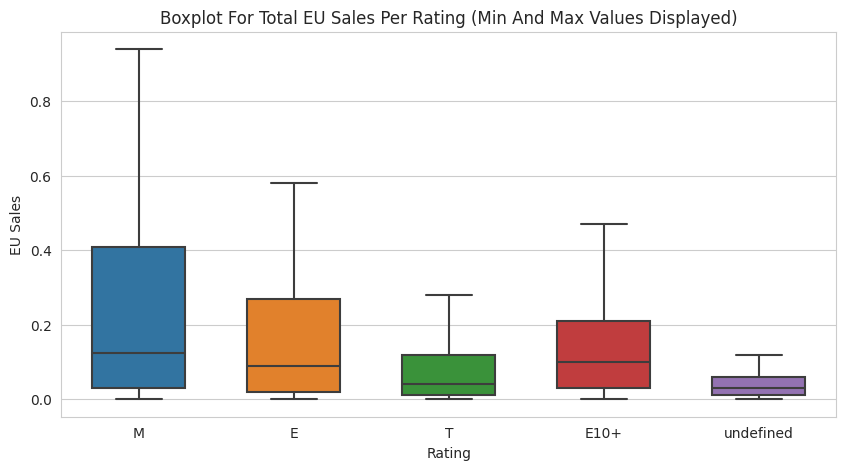

In [86]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per rating.
plt.figure(figsize=(10,5))
sns.boxplot(data=eu_yr_df,
            x="rating",
            y="eu_sales",
            showfliers=False,
            width=0.6)

plt.ylim(-0.05, 0.45)
plt.xlabel("Rating")
plt.ylabel("EU Sales")
plt.title("Boxplot For Total EU Sales Per Rating (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per rating.
plt.figure(figsize=(10,5))
sns.boxplot(data=eu_yr_df,
            x="rating",
            y="eu_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Rating")
plt.ylabel("EU Sales")
plt.title("Boxplot For Total EU Sales Per Rating (Min And Max Values Displayed)")
plt.show()

### JP Profile Boxplots

In [87]:
#Create a dataframe that only displays jp_sales by using the drop() method on the df dataframe.
#Add na_sales, eu_sales, other_sales, and total_sales as an arguement to df.drop() in order to drop those columns.
jp_df = df.drop(['na_sales', 'eu_sales', 'other_sales', 'total_sales'], axis=1)

#Use the head() method in order to print the first five rows of jp_df to check for errors.
jp_df.head()

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,3.77,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,3.79,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,3.28,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,6.50,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,2.93,58.0,6.6,E


Code Result:
The jp_df dataframe was created successfully.  The na_sales, eu_sales, other_sales, total_sales columns were successfully dropped.

In [88]:
#Create a variable called jp_yr_list that contains the values: 2014, 2015, and 2016 (not in string form).
jp_yr_list = [2014, 2015, 2016]
#Use the isin() method to create a boolean series that checks if the values in jp_yr_list
#are present in the jp_df dataframe.
jp_yr = jp_df['year_of_release'].isin(jp_yr_list)
#Use indexing to create the jp_yr_df dataframe.
jp_yr_df = jp_df[na_yr]

#Use the head() method in order to print the first five rows of jp_yr_df.
jp_yr_df.head()

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,0.38,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,0.06,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,0.14,83.0,5.7,M
94,FIFA 17,PS4,2016,Sports,0.08,85.0,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,0.24,87.0,6.5,M


Code Result:
The jp_yr_df dataframe was created successfully.

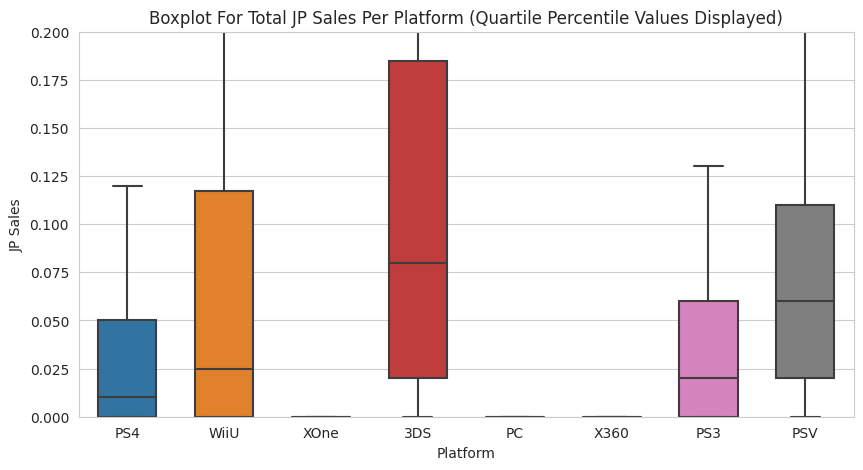

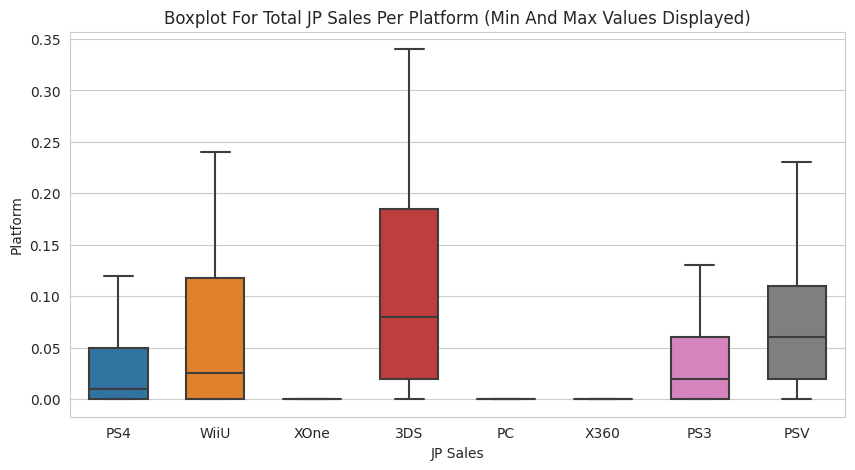

In [89]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of JP total sales per platform.
plt.figure(figsize=(10,5))
sns.boxplot(data=jp_yr_df,
            x="platform",
            y="jp_sales",
            showfliers=False,
            width=0.6)

plt.ylim(0, 0.2)
plt.xlabel("Platform")
plt.ylabel("JP Sales")
plt.title("Boxplot For Total JP Sales Per Platform (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per platform.
plt.figure(figsize=(10,5))
sns.boxplot(data=jp_yr_df,
            x="platform",
            y="jp_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("JP Sales")
plt.ylabel("Platform")
plt.title("Boxplot For Total JP Sales Per Platform (Min And Max Values Displayed)")
plt.show()

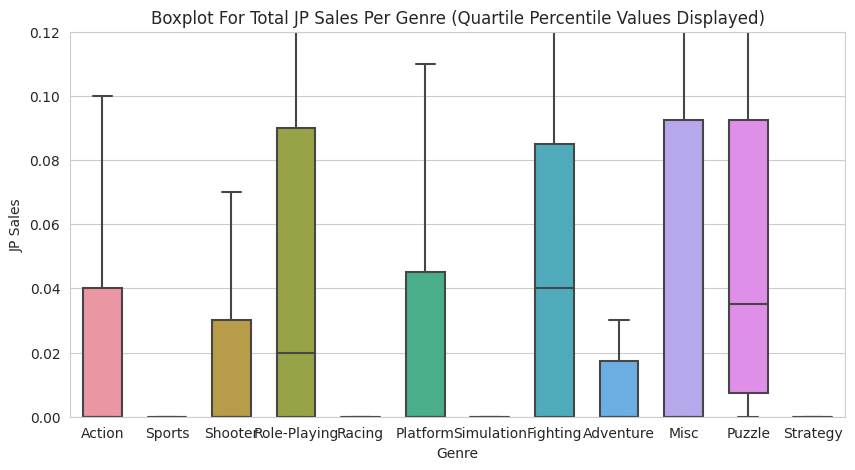

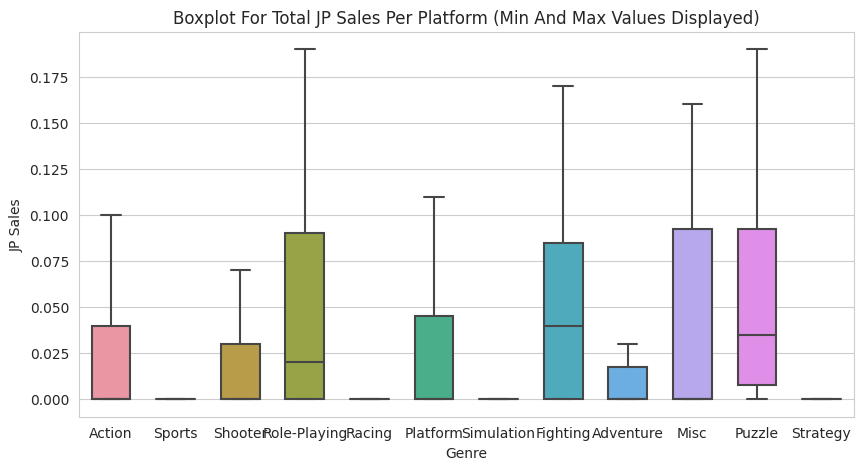

In [90]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of JP total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=jp_yr_df,
            x="genre",
            y="jp_sales",
            showfliers=False,
            width=0.6)

plt.ylim(0, 0.12)
plt.xlabel("Genre")
plt.ylabel("JP Sales")
plt.title("Boxplot For Total JP Sales Per Genre (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per genre.
plt.figure(figsize=(10,5))
sns.boxplot(data=jp_yr_df,
            x="genre",
            y="jp_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Genre")
plt.ylabel("JP Sales")
plt.title("Boxplot For Total JP Sales Per Platform (Min And Max Values Displayed)")
plt.show()

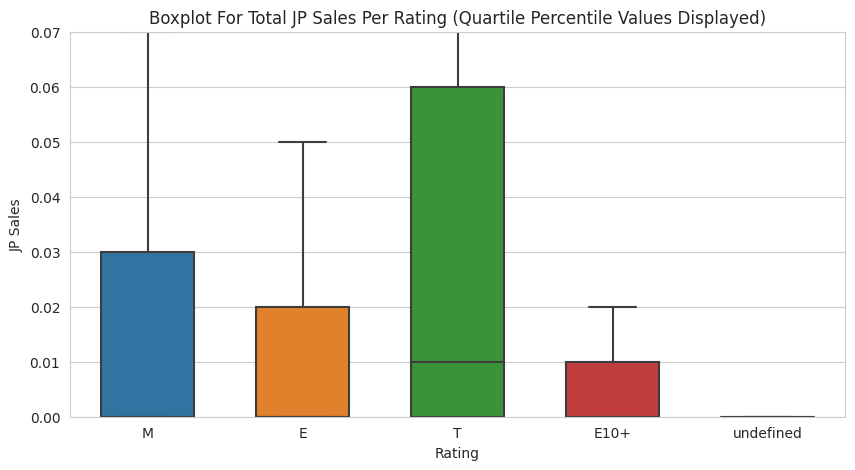

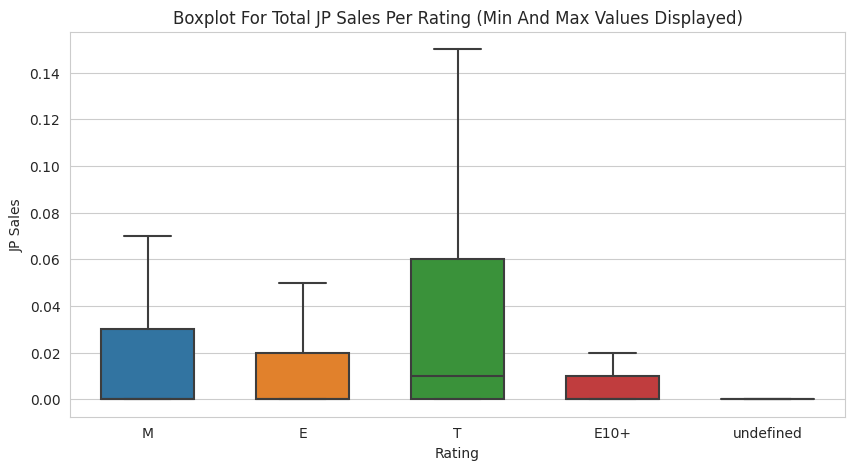

In [91]:
#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of JP total sales per rating.
plt.figure(figsize=(10,5))
sns.boxplot(data=jp_yr_df,
            x="rating",
            y="jp_sales",
            showfliers=False,
            width=0.6)

plt.ylim(0, 0.07)
plt.xlabel("Rating")
plt.ylabel("JP Sales")
plt.title("Boxplot For Total JP Sales Per Rating (Quartile Percentile Values Displayed)")
plt.show()

#Use matplotlib and seaborn to create the boxplots that display the quartile values
#values of EU total sales per rating.
plt.figure(figsize=(10,5))
sns.boxplot(data=jp_yr_df,
            x="rating",
            y="jp_sales",
            showfliers=False,
            width=0.6)

plt.xlabel("Rating")
plt.ylabel("JP Sales")
plt.title("Boxplot For Total JP Sales Per Rating (Min And Max Values Displayed)")
plt.show()

### Step 5: Hypothesis Testing

### Testing Hypotheses and Calculating Variances

Task/ Question Being Addressed:
Test the following hypotheses:

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What significance level you chose to test the hypotheses, and why

In [92]:
#Create a dataframe that only displays filtered results where the platform column of the df dataframe is listed as 'XOne'.
x_box_1 = df[df['platform'] == 'XOne']

#Create a dataframe that only displays filtered results where the platform column of the df dataframe is listed as 'PC'.
pc = df[df['platform'] == 'PC']

In [93]:
#Create a list that consists of the values 2014, 2015, and 2016 that
#are not listed in string format and assign the list to the variable x_box_1_list to save the result.
x_box_1_list = [2014, 2015, 2016]
#Use the isin() method in order to create a boolean series that checks if the values in x_box_1_list are
#present in the x_box_1_yr_df dataframe.
x_box_1_yr = x_box_1['year_of_release'].isin(x_box_1_list)
#Use indexing to create the x_box_1_yr_df dataframe.
x_box_1_yr_df = x_box_1[x_box_1_yr]

x_box_1_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


Code Result:
The x_box_1_yr_df dataframe was created successfully.

In [94]:
#Create a list that consists of the values 2014, 2015,
#and 2016 that are not listed in string format and assign the list to the variable pc_list to save the result.
pc_list = [2014, 2015, 2016]
#Use the isin() method in order to create a boolean series that checks if the values in pc_List are
#present in the pc df.
pc_yr = pc['year_of_release'].isin(pc_list)
#Use indexing to create the pc_yr dataframe.
pc_yr_df = pc[pc_yr]

#Use the head() method in order to print the first five rows of pc_yr_df in order to check for errors.
pc_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
2784,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73


Code Result:
The pc_yr_df dataframe was created successfully.

In [95]:
#Use np.std() in order to calculate the standard deviation for the user_score column of the x_box_1 dataframe.
x_box_1_std = np.std(x_box_1_yr_df['user_score'])

print(f"XBox 1 Years: 2014-2016 User Score Standard Deviation: {x_box_1_std:.2f}")

XBox 1 Years: 2014-2016 User Score Standard Deviation: 1.31


In [96]:
#Use np.std() in order to calculate the standard deviation for the user_score column of the pc dataframe.
pc_std = np.std(pc_yr_df['user_score'])

print(f"PC Years: 2014-2016 User Score Standard Deviation: {pc_std:.2f}")

PC Years: 2014-2016 User Score Standard Deviation: 1.65


Conclusion: The standard deviation for the user_score column of the pc_yr_df dataframe is greater than the standard deviation for the user_score column of the x_box_1_yr dataframe.

In [97]:
#Use np.var() in order to calculate the variance of the user_score column of the x_box_1_yr_df dataframe.
x_box_1_variance = np.var(x_box_1_yr_df['user_score'])

print(f"XBox 1 Years: 2014-2016 User Score Variance: {x_box_1_variance:.2f}")

XBox 1 Years: 2014-2016 User Score Variance: 1.73


In [98]:
#Use np.var() in order to calculate the variance of the user_score column of the pc_yr_df dataframe.
pc_variance = np.var(pc_yr_df['user_score'])

print(f"PC Years: 2014-2016 User Score Variance: {pc_variance:.2f}")

PC Years: 2014-2016 User Score Variance: 2.73


Conclusion: The variance of the user_score column of the pc_yr_df dataframe is greater than the variance from the user_score column of the x_box_1_yr_df dataframe.  The two variances are not equal.

Null Hypothesis Being Tested:
—Average user ratings of the Xbox One and PC platforms are the same.

Alternative Hypothesis:
-Average user ratings of Xbox One and PC platforms are different.


In [99]:
#In order to start preparing for the ttest, first set the threshhold to 0.05 which would indicate
#a 5 percent probablility.  Save this code under the variable alpha.
alpha = 0.05

#Then, use st.ttest_ind() in order to run a ttest on the user_score columns of the x_box_1_yr_df
#and pc_yr_df dataframes.  Set equal_var to False
results = st.ttest_ind(x_box_1_yr_df['user_score'], pc_yr_df['user_score'], equal_var=False)

#Calculate the probablity by using the pvalue method on the results variable,
#and print the pvalue.
print('pvalue: ', results.pvalue)

#Create an if statement that prints "We reject null hypothesis.", if results.pvalue is less than alpha.
if results.pvalue < alpha:
    print("We reject null hypothesis.")
#Create an else statment which prints:
#"We cannot reject null hypothesis". which will pring if results.pvalue is greater than or equal to alpha.
else:
    print("We cannot reject null hypothesis.")

pvalue:  0.1403785186826978
We cannot reject null hypothesis.


ttest rationale:  I used st.ttest_ind() because this ttest in particular tests the equality of two population means.

Conclusion: According to the ttest, it appears that we cannot reject the previously stated null hypothesis and we can conclude that average user ratings of X Box One and PC are possibly equal.

In [100]:
#Using conditional filtering, create a dataframe
#called df_action that only contains rows where the genre column has the result action.
df_action = df[df['genre'] == 'Action']

#Using conditional filtering, create a dataframe
#called df_sports that only contains rows where the genre column has the result sports.
df_sports = df[df['genre'] == 'Sports']

In [101]:
#Create a list that consists of the values 2014, 2015, and 2016 that are
#not listed in string format and assign the list to the variable action_list to save the result.
action_list = [2014, 2015, 2016]
#Use the isin() method to create a boolean series that checks if the values
#in action_list are present in the year_of_release column of the dataframe.
action_yr = df_action['year_of_release'].isin(action_list)
#Use indexing to create the action_yr_df dataframe.
action_yr_df = df_action[action_yr]

#Use the head() method in order to print the first five rows of action_yr_df in order to check for errors.
action_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96


Code Result:
The action_yr_df dataframe was created successfully.

In [102]:
# Create a list that consists of the values 2014, 2015, and 2016 that
#are not listed in string format and assign the list to the variable sports_list to save the result.
sports_list = [2014, 2015, 2016]
#Use the isin() method to create a boolean series that checks if the values
#in sports_list are present in the year_of_release column of the dataframe.
sports_yr = df_sports['year_of_release'].isin(sports_list)
#Use conditional indexing to create the sports_yr_df dataframe.
sports_yr_df = df_sports[sports_yr]

#Use the head() method in order to print the first five rows of sports_yr_df in order to check for errors.
sports_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


Code Result:
The sports_yr_df dataframe was created successfully.

In [103]:
#Use np.std() in order to calculate the standard deviation for
#the user_score column of the action_yr_df dataframe.
action_yr_std = np.std(action_yr_df['user_score'])

print(f"Action Genre, Years:2014-2016 User Score Standard Deviation: {action_yr_std:.2f}")

Action Genre, Years:2014-2016 User Score Standard Deviation: 1.34


In [104]:
#Use np.std() in order to calculate the standard deviation
#for the user_score column of the sports_yr_std dataframe.
sports_yr_std = np.std(sports_yr_df['user_score'])

print(f"Sports Genre, Years:2014-2016 User Score Standard Deviation: {sports_yr_std:.2f}")

Sports Genre, Years:2014-2016 User Score Standard Deviation: 1.48


Conclusion:  The standard deviation for the user_score column sports_yr_df dataframe is greater than the standard deviation for the user_score column of the action_yr_df dataframe.

In [105]:
#Use np.var() in order to calculate the variance of the user_score column of the action_yr_df dataframe
action_yr_var = np.var(action_yr_df['user_score'])

print(f"Action Genre, Years: 2014-2016 Variance: {action_yr_var:.2f}")

Action Genre, Years: 2014-2016 Variance: 1.80


In [106]:
#Use np.var() in order to calculate the variance of the user_score column of the action_yr_df dataframe.
sports_yr_var = np.var(sports_yr_df['user_score'])

print(f"Sports Genre, Years: 2014-2016 Variance: {sports_yr_var:.2f}")

Sports Genre, Years: 2014-2016 Variance: 2.20


Conclusion: The variance of the user_score column of the sports_yr_df dataframe is greater than the variance of the user_score column of the action_yr_df dataframe.  The two variances are not equal.

Null Hypothesis Being Tested:
—Average user scores for the Action and Sports genres are different.

In [107]:
# In order to start preparing for the ttest, first set the threshhold to 0.05 which would indicate a
#5 percent probablility.  Save this code under the variable df_alpha.
df_alpha = 0.05
#Then, use st.ttest_ind() in order to run a ttest on the user_score columns of the action_yr_df and
#sports_yr_df dataframes.  Set equal_var to False.
df_results = st.ttest_ind(action_yr_df['user_score'], sports_yr_df['user_score'], equal_var=False)

#Calculate the probablity by using the pvalue method on the df_results variable, and print the pvalue.
print('pvalue: ', df_results.pvalue)
#Create an if statement that prints "We reject null hypothesis.", if df_results.pvalue is less than alpha.
if results.pvalue < alpha:
    print("We reject null hypothesis.")
#Create an else statment which prints: "We cannot reject null hypothesis".
#which will pring if df_results.pvalue is greater than or equal to alpha.

else:
    print("We cannot reject null hypothesis.")

pvalue:  8.327612976032047e-09
We cannot reject null hypothesis.


ttest rationale:  I used st.ttest_ind() because this ttest in particular tests the equality of two population means.

Conclusion: According to the ttest, the previously stated alternative hypothesis is incorrect, the average user scores of the Action and Sports genres are possibly equal.

### Step 6: Write a General Conclusion

Final Conclusions/ Noteable Findings:

1) Platform and Genre sales varried and differed between NA, EU and JP

2) ESRB Sales Affect Sales in NA and EU, but not JP.

3) The longest amount of time a platform can go from having sales to zero sales is approximately 31 years.  THe shortest amount of time that a platform can go from having sales to zero sales is approximately 3 years.

4) Critic score and user score have an effect on total sales.

5) The first hypothesis which states: "Average user ratings of the Xbox One and PC platforms are the same.", was proven to possibly be correct.

6) The second hypothesis which states: "Average user ratings for the Action and Sports genres are different.", was proven to be incorrect.

7) Shooter was the most popular genre for the year 2016, which could possibly be a profitable genre in 2017.

8) PS4 was the most popular platform for the year 2016, which could possibly be a profitable platform in the year 2017.

9) E was the most popular rating for the year 2016, which could possibly be a porftiable platform in the year 2017.

10) 2007, 2008 and 2009 had the greatest amount of games released per year among all the years recorded.